# 4th Phase: Unsupervised ML (Clustering):-

# 4.1)  "Create 3 clusters as below.

# 1. Sensitive Area's

# 2. Moderate Area's

# 3. Peaceful Area's"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Merging different CSV files:-

In [2]:
df1=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df3=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv') 
df4=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df5=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df6=pd.read_csv('CombineData.csv')

In [3]:
#Concat the all datasets:-

df = pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Male_Literacy,Female_Litracy,Litracy_rate,Area (km2),Total Crimes,tot_crimes_sc,total crime against women,Total crimes against STs,Total crime against children,Crime Rate
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45500,NaN,NaN,NaN,1949.0,2954.0,44.0,737.0,0.0,737.0,1945.0,...,28573260.0,24701302.0,80.88,130058.0,415626.0,1647.0,6381.0,27.0,1036.0,275.122399
45501,NaN,NaN,NaN,124.0,79.0,2.0,229.0,0.0,229.0,139.0,...,1538903.0,1355550.0,80.89,10486.0,13461.0,76.0,1559.0,29.0,20.0,168.493039
45502,NaN,NaN,NaN,4966.0,4811.0,1410.0,1963.0,0.0,1963.0,8878.0,...,70418482.0,48470720.0,67.98,240928.0,444403.0,6202.0,23033.0,44.0,6033.0,97.955952
45503,NaN,NaN,NaN,217.0,161.0,44.0,148.0,0.0,148.0,297.0,...,3971891.0,3128883.0,79.22,53483.0,20122.0,33.0,1055.0,3.0,122.0,86.565649


In [4]:
df=pd.concat([df6['total crime against women'],df6['Total crime against children'],df6['tot_crimes_sc'],df6['Total crimes against STs']],axis=1)

In [5]:
df.columns

Index(['total crime against women', 'Total crime against children',
       'tot_crimes_sc', 'Total crimes against STs'],
      dtype='object')

In [6]:
df_new = pd.concat([df1,df2,df3,df4,df5,df],ignore_index=True)
df_new

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6381.0,1036.0,1647.0,27.0
45501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1559.0,20.0,76.0,29.0
45502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23033.0,6033.0,6202.0,44.0
45503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1055.0,122.0,33.0,3.0


In [7]:
# Using the info technique to check columns for information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45505 entries, 0 to 45504
Data columns (total 64 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             45085 non-null  object 
 1   DISTRICT                                             45085 non-null  object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null

# Description of Column:

* State/UT: Each State/UT is represented

* District: Each state has a different district.

* Year: (during which crimes were committed) 2001–2012

* various crimes that fall into many categories-

* "CULPABLE HOMICIDE NOT AMOUNTING TO MURDER," "MURDER," "ATTEMPT TO MURDER," "kidnapping and abduction," "kidnapping and abduction of women and girls," "kidnapping and abduction of others," "RAPE," "CUSTODIAL RAPE," "OTHER RAPE," "DACOITY," "ASSEMBLY AND PREPARATION FOR DACOITY," The terms "robbery," "burglary," "thief," "auto theft," "other theft," and "riots" "BREACH OF TRUST CRIMINAL," "DOWRY DEATHS," "CHEATING," "COUNTERFIETING," "ARSON," "HURT/GREVIOUS HURT," 'WOMEN ASSAULT WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',

* "ENTIRE IPC CRIMES,"

* "Complete offenses against females,"

* "Complete offenses against children,"

* "Whole-scale offenses against SCs,"

* "Overall offenses against STs"

In [8]:
df_new.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,18036.000000,18036.000000,18036.000000,9018.000000,9018.000000,9018.000000,411.000000,418.000000,420.000000,387.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,6.514194,15.454757,0.516855,35.416168,0.220670,7.358616,5141.299270,587.267943,14884.821429,185.077519
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,38.197287,109.408804,6.473524,205.419212,1.361264,46.334960,6599.149455,1036.458881,91151.189568,393.275773
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.000000,26.000000,0.000000,0.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2580.000000,103.000000,23.500000,6.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,2.000000,5.000000,0.000000,19.000000,0.000000,3.000000,7522.500000,632.250000,710.500000,209.500000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,1252.000000,4885.000000,459.000000,4771.000000,45.000000,1509.000000,30585.000000,6033.000000,653748.000000,2894.000000


In [9]:
df_new['DISTRICT'].value_counts()

TOTAL              2070
G.R.P.              230
SOUTH               185
NORTH               185
WEST                180
                   ... 
BADWANI               1
GARI HILLS EAST       1
KANCHEEPURAM          1
AMBEDKARNAGAR         1
RAILWAYSJMU           1
Name: DISTRICT, Length: 824, dtype: int64

* Assuming that Total in the District is displaying the complete number of states, and since we require our clusters in the district form, it is best to remove these total rows as well as the DELHI UT total rows.

In [10]:
# obtaining the 'TOTAL' rows' index values
print(list(np.where(df_new["DISTRICT"]=='TOTAL')))

[array([   28,    42,    70, ..., 45079, 45081, 45084], dtype=int64)]


In [11]:
print(list(np.where(df_new["DISTRICT"]=='DELHI UT TOTAL')))

[array([  700,  1418,  2147,  2876,  3609,  4348,  5090,  5849,  6616,
        7395,  8186,  8997,  9717, 10435, 11164, 11893, 12626, 13365,
       14107, 14866, 15633, 16412, 17203, 18014, 18733, 19451, 20179,
       20908, 21642], dtype=int64)]


* We can drop these rows as we have the indices values for each Total and DELHI Total row.

In [12]:
df_new.drop([ 700,  1418,  2147,  2876,  3609,  4348,  5090,  5849,  6616,
        7395,  8186,  8997,  9717, 10435, 11164, 11893, 12626, 13365,
       14107, 14866, 15633, 16412, 17203, 18014, 18733, 19451, 20179,
       20908, 21642], axis=0, inplace=True)

In [13]:
df_new['DISTRICT'].replace('TOTAL',np.nan,inplace=True)
df_new['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', nan, 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKI

In [14]:
df_new.reset_index(drop = True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6381.0,1036.0,1647.0,27.0
45472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1559.0,20.0,76.0,29.0
45473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23033.0,6033.0,6202.0,44.0
45474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1055.0,122.0,33.0,3.0


In [15]:
df_new['DISTRICT'].value_counts()

G.R.P.             230
SOUTH              185
NORTH              185
WEST               180
RAILWAYS           172
                  ... 
BADWANI              1
GARI HILLS EAST      1
KANCHEEPURAM         1
AMBEDKARNAGAR        1
RAILWAYSJMU          1
Name: DISTRICT, Length: 822, dtype: int64

In [16]:
print("We have {} Rows and {} Columns in our dataframe".format(df_new.shape[0], df_new.shape[1]))

We have 45476 Rows and 64 Columns in our dataframe


# Finding Null values:-

In [17]:
#checking null values in dataset:-

print(df_new.isna().sum())

STATE/UT                          420
DISTRICT                         2490
YEAR                            36471
MURDER                          36471
ATTEMPT TO MURDER               36471
                                ...  
Other Crimes Against STs        36458
total crime against women       45065
Total crime against children    45058
tot_crimes_sc                   45056
Total crimes against STs        45089
Length: 64, dtype: int64


# Removing Null Values:-

In [18]:
elements= df_new.select_dtypes(include=['object']).columns

print(elements)

for i in elements:
    df_new[i]=df_new[i].fillna(df_new[i].mode()[0])

Index(['STATE/UT', 'DISTRICT'], dtype='object')


In [19]:
cont= df_new.select_dtypes(include=['float']).columns

print(cont)

for i in cont:
    df_new[i]=df_new[i].fillna(df_new[i].mean())

Index(['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Year', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       '

In [20]:
#checking null values in dataset:-

print(df_new.isna().sum())

STATE/UT                        0
DISTRICT                        0
YEAR                            0
MURDER                          0
ATTEMPT TO MURDER               0
                               ..
Other Crimes Against STs        0
total crime against women       0
Total crime against children    0
tot_crimes_sc                   0
Total crimes against STs        0
Length: 64, dtype: int64


# A few columns have been removed from our dataset because they relate to total crimes against women and already exist there. These include "INSULT TO MODESTY OF WOMEN," "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS," "CRUELTY BY HUSBAND OR HIS RELATIVES," "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES," and "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY.":-

In [21]:
df_new.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [22]:
print("We have {} Rows and {} Columns in our dataframe".format(df_new.shape[0], df_new.shape[1]))

We have 45476 Rows and 59 Columns in our dataframe


In [23]:
df_new.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
count,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000,...,45476.000000,45476.000000,45476.000000,45476.000000,45476.00000,45476.000000,45476.000000,45476.000000,45476.000000,45476.000000
mean,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,13.152360,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.299270,587.267943,14884.821429,185.077519
std,1.541216,145.557651,134.982226,26.482384,84.553878,0.051305,84.546724,136.690519,36.443859,25.279514,...,24.054938,68.900757,4.076735,91.471487,0.60616,20.632577,626.604542,99.250739,8749.495224,36.233016
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,13.152360,...,0.000000,1.000000,0.000000,35.416168,0.22067,7.358616,5141.299270,587.267943,14884.821429,185.077519
50%,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,13.152360,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.299270,587.267943,14884.821429,185.077519
75%,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,13.152360,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.299270,587.267943,14884.821429,185.077519
max,2012.000000,7601.000000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,2416.000000,1319.000000,...,1252.000000,4885.000000,459.000000,4771.000000,45.00000,1509.000000,30585.000000,6033.000000,653748.000000,2894.000000


# Observations:-

* With a minimum value of 0 and a maximum value of 542 for the murder column, a few districts ought to have this count as its maximum murder value.
* ATTEMPT TO MURDER has a maximum value of 741. In contrast, the RAPE column has a maximum value of 568. We can also check the other columns.
* Total crimes against women have a minimum value of 0 and a maximum value of 30585. The total IPC offenses have a minimum value of 0 and a maximum value of 34638.

* Based on these valuable insights.Districts with mid values fall under the category of moderate area, districts with maximum values for columns fall under the category of sensitive area, while districts with minimum values fall under the category of peaceful area.

# Examining the dataset by district grouping:-

In [24]:
#Sorting by state or territory
group_state = df_new.groupby('STATE/UT')

In [25]:
group_state.first()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,ANDAMAN,2001.000000,13.000000,0.000000,0.000000,3.000000,0.000000,3.000000,2.000000,0.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
ANDHRA PRADESH,ADILABAD,2001.000000,101.000000,60.000000,17.000000,50.000000,0.000000,50.000000,46.000000,16.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
ARUNACHAL PRADESH,CHANGLANG,2001.000000,11.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
ASSAM,BARPETA,2001.000000,64.000000,5.000000,0.000000,28.000000,0.000000,28.000000,105.000000,17.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
BIHAR,ARARIA,2001.000000,47.000000,27.000000,4.000000,93.000000,0.000000,93.000000,79.000000,66.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
CHANDIGARH,CHANDIGARH,2001.000000,15.000000,10.000000,6.000000,18.000000,0.000000,18.000000,56.000000,6.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
CHHATTISGARH,BALRAMPUR,2001.000000,13.000000,2.000000,0.000000,17.000000,0.000000,17.000000,1.000000,0.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
D & N HAVELI,D and N HAVELI,2001.000000,3.000000,2.000000,0.000000,6.000000,0.000000,6.000000,4.000000,2.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
DAMAN & DIU,DAMAN,2001.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519


In [26]:
# Printing each group's maximum value.
group_state.max()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,SOUTH,2012.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,6.514194,15.454757,0.516855,35.416168,1.00000,17.000000,5141.29927,587.267943,14884.821429,185.077519
ANDHRA PRADESH,WEST GODAVARI,2012.000000,2808.000000,2229.000000,171.000000,1442.000000,1.000000,1442.000000,2154.000000,701.000000,...,722.000000,1737.000000,459.000000,1874.000000,10.00000,425.000000,5141.29927,587.267943,14884.821429,185.077519
ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2012.000000,88.715269,77.587674,9.810661,59.000000,0.005775,59.000000,93.000000,34.000000,...,38.000000,15.454757,0.516855,35.416168,10.00000,57.000000,5141.29927,587.267943,14884.821429,185.077519
ASSAM,UDALGURI,2012.000000,1426.000000,670.000000,117.000000,1721.000000,5.000000,1716.000000,3812.000000,626.000000,...,114.000000,15.454757,1.000000,103.000000,24.00000,71.000000,5141.29927,587.267943,14884.821429,185.077519
BIHAR,VAISHALI,2012.000000,3948.000000,5452.000000,396.000000,1555.000000,1.000000,1555.000000,4807.000000,2416.000000,...,539.000000,4436.000000,113.000000,661.000000,3.00000,27.000000,5141.29927,587.267943,14884.821429,185.077519
CHANDIGARH,G.R.P.,2012.000000,88.715269,77.587674,10.000000,52.398667,0.005775,52.392893,87.000000,21.000000,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519
CHHATTISGARH,SURGUJA,2012.000000,1169.000000,825.000000,51.000000,1053.000000,0.005775,1053.000000,472.000000,107.000000,...,109.000000,221.000000,22.000000,383.000000,14.00000,363.000000,5141.29927,587.267943,14884.821429,185.077519
D & N HAVELI,G.R.P.,2012.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,6.514194,15.454757,0.516855,35.416168,4.00000,19.000000,5141.29927,587.267943,14884.821429,185.077519
DAMAN & DIU,G.R.P.,2012.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,6.514194,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519


* The aforementioned grouping by (highest value) operations can assist us in determining the state or territory in which the greatest number of crimes were committed (e.g., BIHAR, had 542 murder cases in 2012, while UTTAR PRADESH had 324 murder-based cases in the same year).

* The fact that all offenses were committed in 2012 shows that crime rates increased throughout time, reaching their peak in the last year of 2012 (the last year included in the dataset).

In [27]:
#Printing each group's most recent value.
group_state.last()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,2.000000,0.000000,35.416168,0.00000,2.000000,5141.29927,587.267943,14884.821429,185.077519
ANDHRA PRADESH,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,132.000000,127.000000,0.000000,35.416168,0.00000,346.000000,5141.29927,587.267943,14884.821429,185.077519
ARUNACHAL PRADESH,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,6.000000,0.000000,0.000000,35.416168,1.00000,3.000000,5141.29927,587.267943,14884.821429,185.077519
ASSAM,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,0.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519
BIHAR,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,118.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519
CHANDIGARH,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,0.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519
CHHATTISGARH,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,66.000000,0.000000,0.000000,35.416168,10.00000,129.000000,5141.29927,587.267943,14884.821429,185.077519
D & N HAVELI,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,1.000000,0.000000,35.416168,0.00000,3.000000,5141.29927,587.267943,14884.821429,185.077519
DAMAN & DIU,G.R.P.,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,0.000000,0.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519


# Data Preparation Prior to Standardization Implementation:-

In [28]:
df_new.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       '

In [29]:
X=df_new[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total', 'Dacoity',
       'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Kidnapping Abduction', 'Other Crimes Against STs',
       'total crime against women', 'Total crime against children',
       'tot_crimes_sc', 'Total crimes against STs']]

In [30]:
df_new.dtypes

STATE/UT                                                object
DISTRICT                                                object
YEAR                                                   float64
MURDER                                                 float64
ATTEMPT TO MURDER                                      float64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              float64
RAPE                                                   float64
CUSTODIAL RAPE                                         float64
OTHER RAPE                                             float64
KIDNAPPING & ABDUCTION                                 float64
KIDNAPPING AND ABDUCTION OF OTHERS                     float64
DACOITY                                                float64
PREPARATION AND ASSEMBLY FOR DACOITY                   float64
ROBBERY                                                float64
BURGLARY                                               float64
THEFT                                                  

In [31]:
from sklearn.cluster import KMeans

# Data Normalization for all Kinds of Clustering:-

* To make sure that every variable is given the same weight by the distance measure, it is crucial to normalize the data. The variable with the biggest scale will dominate the measure if normalization is not applied.By removing redundant data and guaranteeing the creation of high-quality clusters, normalization helps increase the effectiveness of clustering algorithms.Since Euclidean distance is highly sensitive to changes in differences, it becomes a necessary step before clustering.

# K-Means Cluster Analysis:

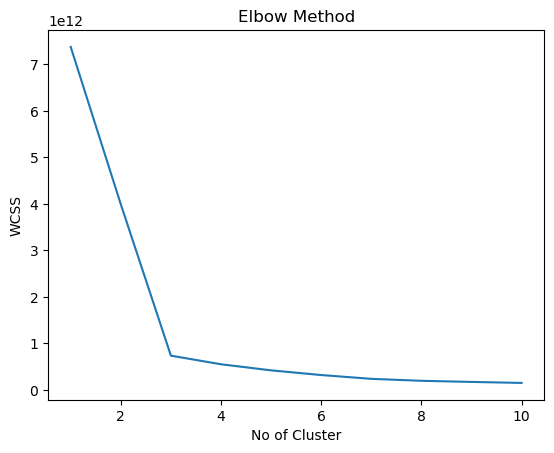

In [32]:
wcss=[] # the sum of square distance within cluster.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

* Selecting k=3 is appropriate as, in order to meet the requirements, we must build three clusters. The Elbow technique also demonstrates this.

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [34]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
df_new.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       '

In [37]:
enc=OrdinalEncoder()
df_new['STATE/UT']=enc.fit_transform(df_new[['STATE/UT']])
df_new['DISTRICT']=enc.fit_transform(df_new[['DISTRICT']])

In [38]:
y_kmeans = kmeans.fit_predict(df_new)

y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [40]:
#starting the cluster numbering at 0 rather than 1.
y_kmeans1=y_kmeans+1

In [41]:
# The cluster is a new list.
cluster = list(y_kmeans1)
# A cluster is added to our dataset.
df_new['cluster'] = cluster

In [42]:
#Average across Clusters 1 through 3
kmeans_mean_cluster = pd.DataFrame(round(df_new.groupby('cluster').mean(),1))
kmeans_mean_cluster

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs
cluster,,,,,,,,,,,,,,,,,,,,,
1,19.3,404.3,2006.6,82.6,72.0,9.1,49.2,0.0,49.2,71.4,...,6.5,15.5,0.5,35.4,0.2,7.4,5141.0,587.2,14756.5,184.9
2,33.0,244.0,2006.6,88.7,77.6,9.8,52.4,0.0,52.4,76.5,...,6.5,15.5,0.5,35.4,0.2,7.4,6271.7,1063.6,596597.3,1020.9
3,19.4,244.0,2006.6,2272.3,2093.1,268.3,1212.5,0.1,1212.4,1893.7,...,6.5,15.5,0.5,35.4,0.2,7.4,5141.3,587.3,14884.8,185.1


* The mean value for each cluster for each offense is shown in the clusters above.

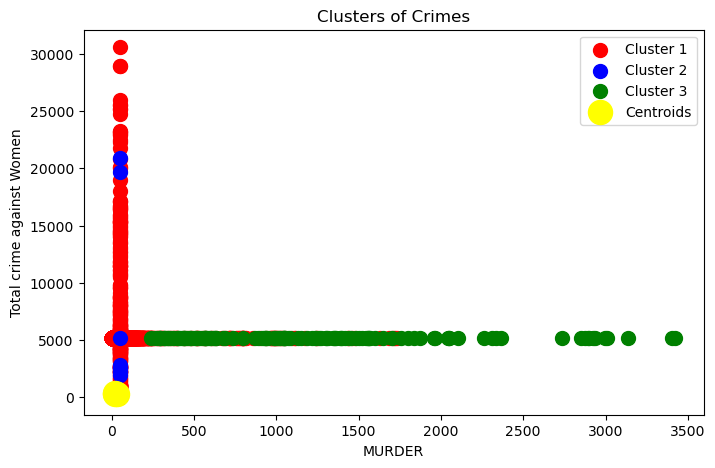

In [43]:
#in y_kmeans1
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['RAPE'], X[y_kmeans1 == 1]['total crime against women'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['RAPE'], X[y_kmeans1 == 2]['total crime against women'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['RAPE'], X[y_kmeans1 == 3]['total crime against women'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('MURDER')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

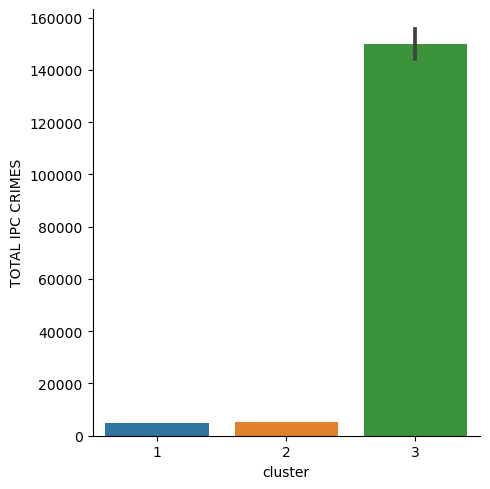

In [44]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df_new, kind='bar')

* We may name the clusters according to the requirements since, according to the above cat plot, Cluster 2 has the lowest TOTAL IPC CRIMES and Cluster 3 has the greatest IPC CRIMES.

<Axes: xlabel='MURDER', ylabel='ATTEMPT TO MURDER'>

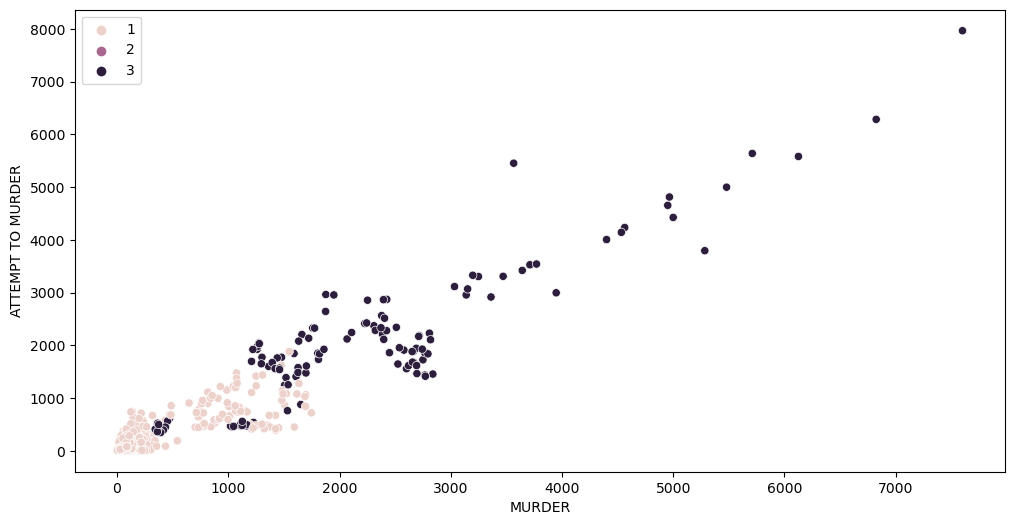

In [45]:
# Making a scatterplot. 

plt.figure(figsize=(12,6))
sns.scatterplot(x=df_new['MURDER'], y = df_new['ATTEMPT TO MURDER'],hue=y_kmeans1)

* The distribution of the states is depicted in the scatter above, with obvious clusters based on Murders and ATTEMPT to Murder. Additionally, there is a significant association among states between the incidence of murder and murder attempts.

* After dividing the data according to the cluster value, it will be analyzed and labelled as sensitive, moderate, or peaceful.

In [46]:
data1=df_new[df_new['cluster']==1]
data2=df_new[df_new['cluster']==2]
data3=df_new[df_new['cluster']==3]

# District-by-district Grouping and Then Looking for the Maximum Values for Each Column:-

In [47]:
data3.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,35.0,2012.0,7601.0,7964.0,1616.0,3425.0,1.0,3425.0,8878.0,2416.0,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,3


In [48]:
data3.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,1.0,2001.0,343.0,341.0,13.0,236.0,0.0,236.0,162.0,67.0,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,3


* Creating a senstivearea dataframe (with cluster value 3) from data3.

In [49]:
sensitivearea=df_new[df_new['cluster']==3]

# Verifying data2:-

In [50]:
data2.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,33.0,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,15.454757,0.516855,35.416168,0.22067,7.358616,20906.0,1807.0,653748.0,1351.0,2


In [51]:
data2.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,33.0,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,15.454757,0.516855,35.416168,0.22067,7.358616,1906.0,204.0,542551.0,185.077519,2


In [52]:
data2.shape

(10, 60)

In [53]:
peacefularea=df_new[df_new['cluster']==2] 

* We have a sensitive, peaceful location, hence data1 with cluster value 1 will be our moderate area.

* Cluster 1 data analysis by district grouping

In [54]:
moderatearea=df_new[df_new['cluster']==1] 

In [55]:
data1.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
0.0,35.0,2012.000000,244.000000,238.000000,241.000000,231.000000,0.005775,231.000000,587.000000,173.000000,...,15.454757,0.516855,35.416168,1.00000,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
1.0,35.0,2012.000000,263.000000,123.000000,75.000000,308.000000,0.005775,308.000000,419.000000,65.000000,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
2.0,0.0,2007.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
3.0,1.0,2012.000000,113.000000,94.000000,17.000000,88.000000,0.005775,88.000000,96.000000,30.000000,...,37.000000,16.000000,52.000000,4.00000,27.000000,5141.29927,587.267943,14884.821429,185.077519,1
4.0,33.0,2012.000000,181.000000,190.000000,55.000000,76.000000,0.005775,76.000000,395.000000,71.000000,...,215.000000,0.516855,126.000000,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817.0,17.0,2012.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,26.000000,...,52.000000,0.516855,43.000000,0.22067,20.000000,5141.29927,587.267943,14884.821429,185.077519,1
818.0,13.0,2012.000000,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,83.000000,37.000000,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
819.0,21.0,2012.000000,88.715269,87.000000,13.000000,66.000000,0.005775,66.000000,76.472071,19.596557,...,15.454757,1.000000,35.416168,4.00000,21.000000,5141.29927,587.267943,14884.821429,185.077519,1


In [56]:
data1.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
0.0,35.0,2001.000000,88.715269,6.000000,9.810661,52.398667,0.000000,52.392893,76.472071,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
1.0,35.0,2001.000000,88.715269,2.000000,9.810661,47.000000,0.000000,47.000000,53.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
2.0,0.0,2006.629206,15.000000,19.000000,1.000000,3.000000,0.000000,3.000000,12.000000,3.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,5141.29927,587.267943,14884.821429,185.077519,1
3.0,1.0,2001.000000,73.000000,39.000000,8.000000,35.000000,0.000000,35.000000,41.000000,6.000000,...,0.000000,0.000000,10.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
4.0,33.0,2001.000000,88.715269,77.587674,9.810661,26.000000,0.000000,26.000000,76.472071,19.596557,...,0.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817.0,17.0,2006.629206,23.000000,21.000000,0.000000,5.000000,0.000000,5.000000,20.000000,2.000000,...,9.000000,0.000000,30.000000,0.00000,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
818.0,13.0,2001.000000,21.000000,14.000000,0.000000,12.000000,0.000000,12.000000,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
819.0,21.0,2001.000000,56.000000,43.000000,1.000000,33.000000,0.000000,33.000000,28.000000,1.000000,...,0.000000,0.000000,4.000000,0.00000,4.000000,5141.29927,587.267943,14884.821429,185.077519,1


# 4.2 For every cluster, creating a DataFrame that displays data based on the areas:

* 3 datasets were created based on the cluster value and given the following names.

* Cluster 3: Sensitive Area;
* Cluster 1: Moderate Area;
* Cluster 2: Peaceful Area

# Making the Clusters Visible:-

In [57]:
kmeans.cluster_centers_

array([[1.93381782e+01, 4.04343494e+02, 2.00662917e+03, 8.26469438e+01,
        7.19865497e+01, 9.09220338e+00, 4.91746540e+01, 5.50389469e-03,
        4.91691501e+01, 7.14219273e+01, 1.82607870e+01, 1.23362636e+01,
        6.56371206e+00, 5.04584747e+01, 2.27972185e+02, 6.96959021e+02,
        2.48870462e+02, 4.48088559e+02, 1.58943315e+02, 3.74056605e+01,
        1.54528500e+02, 5.43007156e+00, 2.34290954e+01, 6.85024673e+02,
        1.85701667e+01, 2.04729041e+02, 1.98275317e+03, 4.84538604e+03,
        2.00662964e+03, 1.75167037e+01, 2.56288580e+01, 2.00801777e+01,
        9.98085508e+01, 2.73649084e+01, 1.92691949e+02, 1.98001110e-01,
        1.97647494e+00, 2.71252361e-01, 1.23902656e-01, 2.08623180e+00,
        9.06211801e-01, 7.50083343e-02, 1.70796755e-01, 2.48805423e-01,
        1.50138904e+01, 5.41014428e+01, 6.66444888e-02, 1.49811488e-01,
        3.60168552e-01, 6.51419383e+00, 1.54547572e+01, 5.16855179e-01,
        3.54161677e+01, 2.20669772e-01, 7.35861610e+00, 5.141049

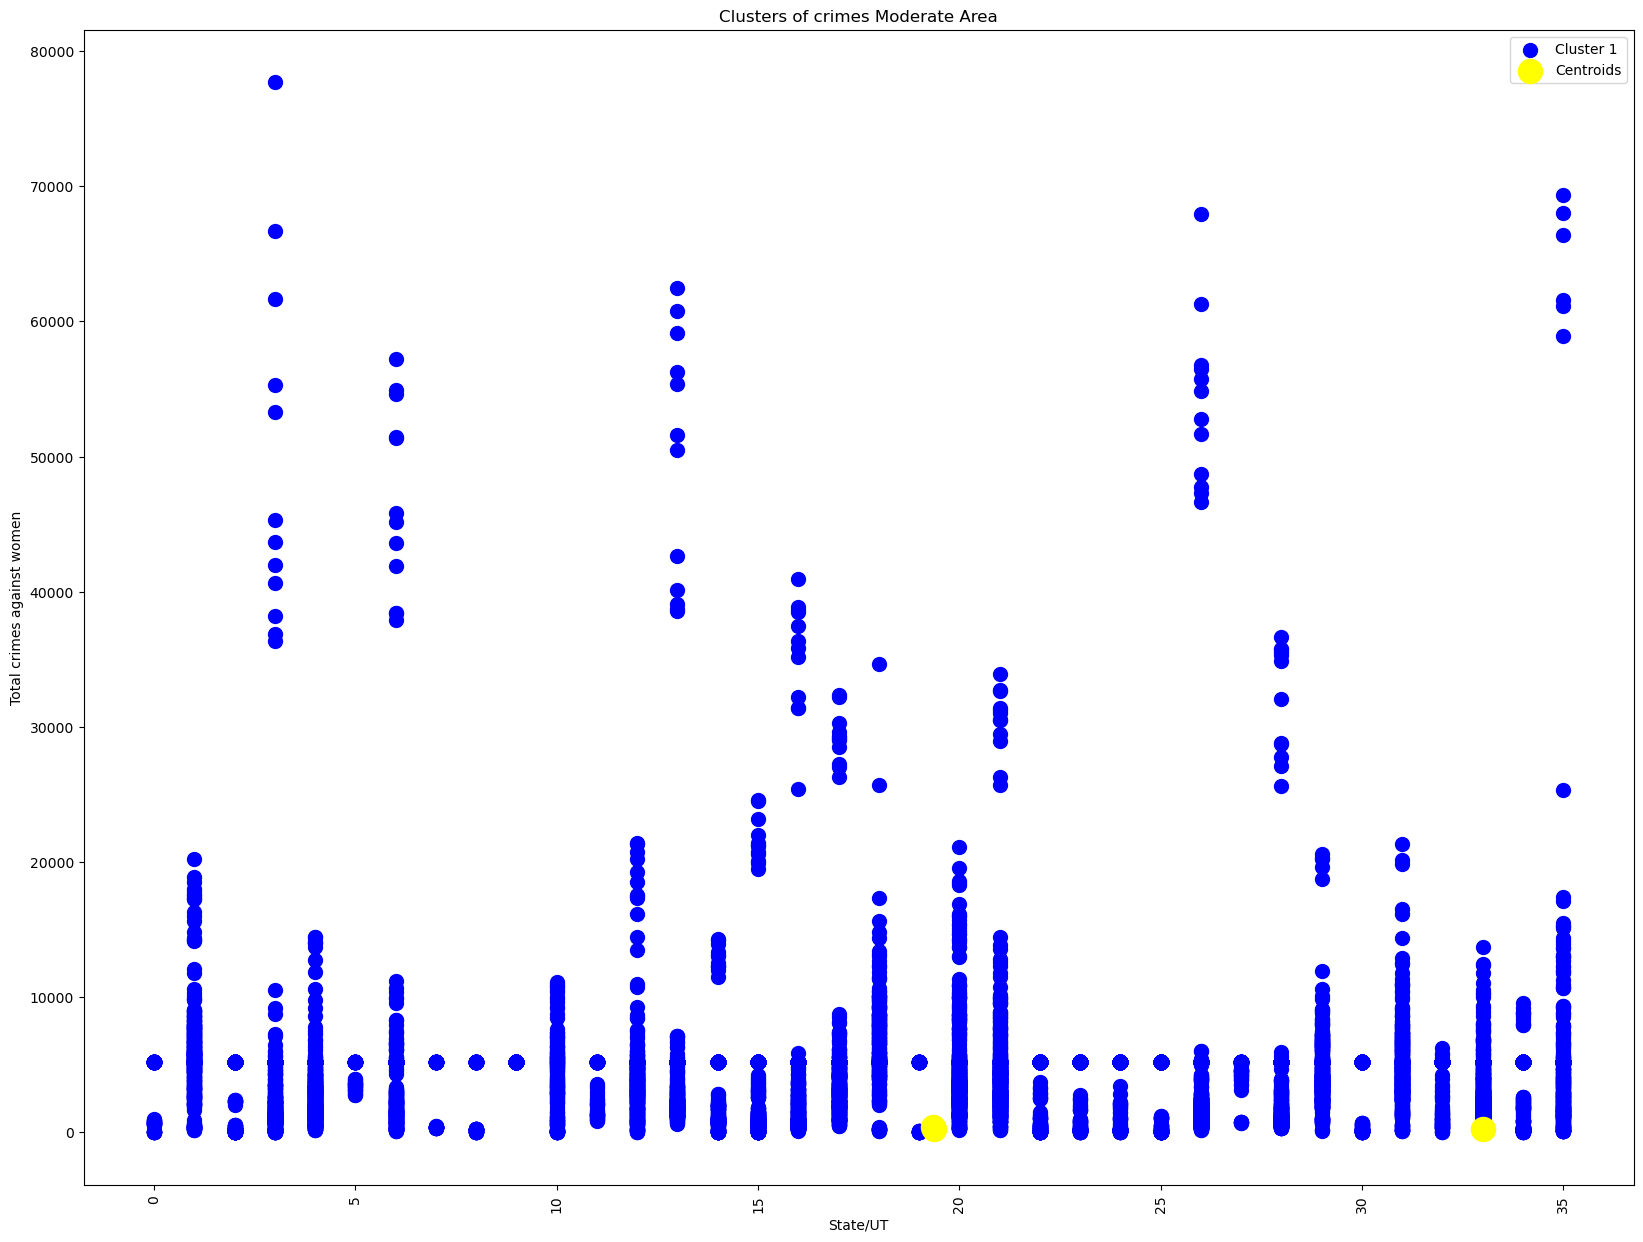

In [58]:
plt.figure(figsize=(20,15))
plt.scatter(moderatearea['STATE/UT'], moderatearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xticks(rotation=90)
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

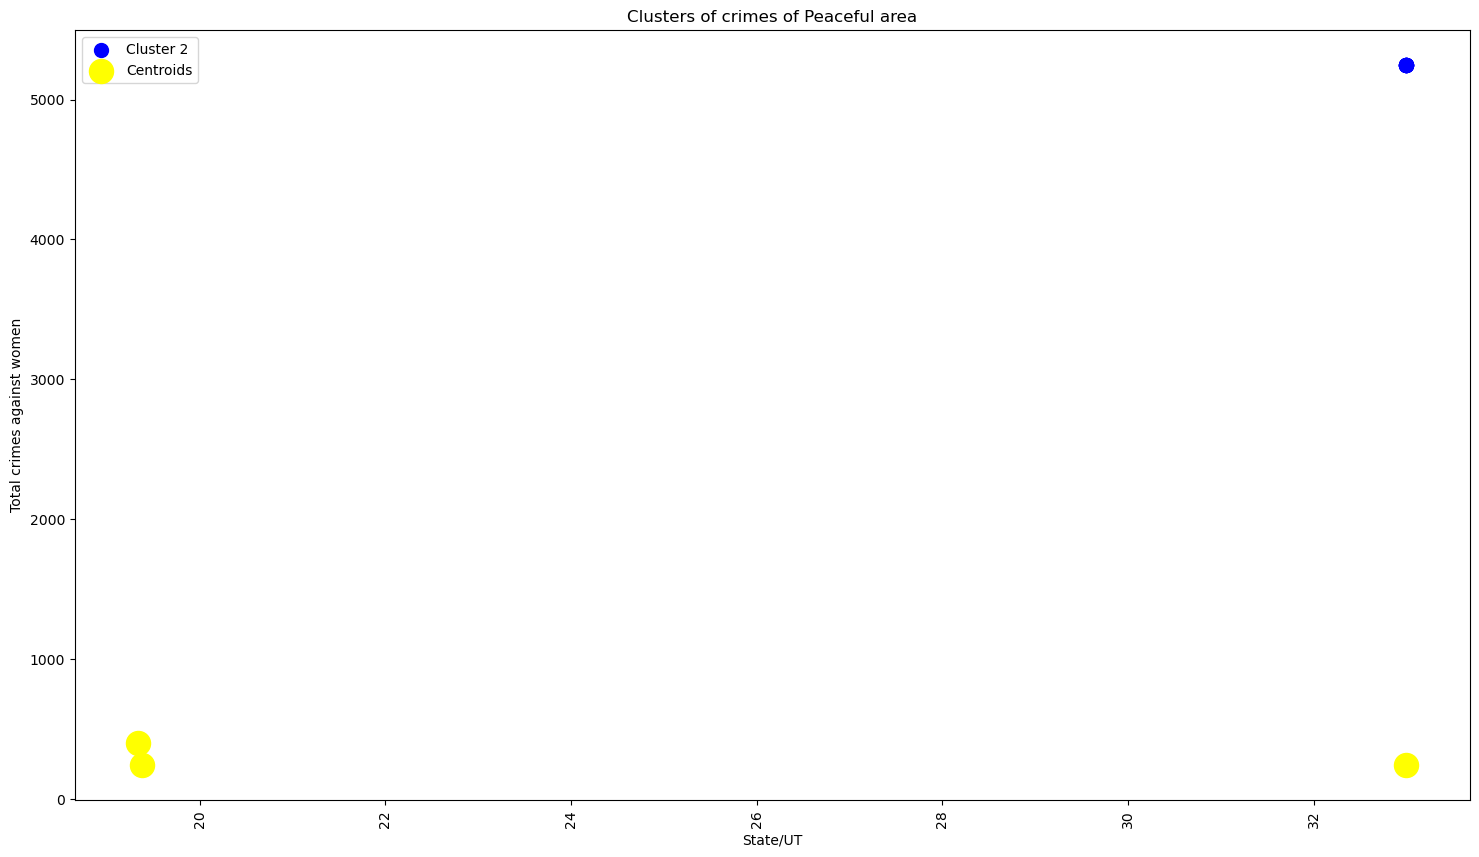

In [59]:
plt.figure(figsize=(18,10))
plt.scatter(peacefularea['STATE/UT'], peacefularea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 2'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xticks(rotation=90)
plt.title('Clusters of crimes of Peaceful area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import silhouette_score

# 4.3 Examining our clusters and writing a report outlining all of our findings.

In [61]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total', 'Dacoity',
       'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Kidnapping Abduction', 'Other Crimes Against STs',
       'total crime against women', 'Total crime against children',
       'tot_crimes_sc', 'Total crimes against STs'], index =['STATE/UT','DISTRICT','YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT DISTRICT YEAR                                            
1.0      244.0    2001.0   872.0             1555.0      3051.0   
                  2002.0   991.0             1644.0      3544.0   
                  2003.0  1049.0             1678.0      4521.0   
                  2004.0   915.0             1908.0      5042.0   
                  2005.0   967.0             1724.0      5465.0   
...                          ...                ...         ...   
35.0     244.0    2008.0   150.0             1732.0      2593.0   
                  2009.0   344.0             2119.0      3709.0   
                  2010.0   331.0             2111.0      4123.0   
                  2011.0   413.0             2242.0      4642.0   
                  2012.0   396.0             2854.0      5158.0   

                          Abetment of suicide     Arson  \
STATE/UT DISTRICT YEAR                                    
1.0      244.0    2001.0             0.123903  0.360169   
                  2002.0             0.123903  0.360169   
                  2003.0             0.123903  0.360169   
                  2004.0             0.123903  0.360169   
                  2005.0             0.123903  0.360169   
...                                       ...       ...   
35.0     244.0    2008.0             0.123903  0.360169   
                  2009.0             0.123903  0.360169   
                  2010.0             0.123903  0.360169   
                  2011.0             0.123903  0.360169   
                  2012.0             0.123903  0.360169   

                          Assault on women with intent to outrage her modesty  \
STATE/UT DISTRICT YEAR                                                          
1.0      244.0    2001.0                                          99.808551     
                  2002.0                                          99.808551     
                  2003.0                                          99.808551     
                  2004.0                                          99.808551     
                  2005.0                                          99.808551     
...                                                                     ...     
35.0     244.0    2008.0                                          99.808551     
                  2009.0                                          99.808551     
                  2010.0                                          99.808551     
                  2011.0                                          99.808551     
                  2012.0                                          99.808551     

                          BURGLARY  Buying of girls for prostitution  \
STATE/UT DISTRICT YEAR                                                 
1.0      244.0    2001.0    7220.0                          0.075008   
                  2002.0    7628.0                          0.075008   
                  2003.0    9050.0                          0.075008   
                  2004.0    8457.0                          0.075008   
                  2005.0    7954.0                          0.075008   
...                            ...                               ...   
35.0     244.0    2008.0     462.0                          0.075008   
                  2009.0     329.0                          0.075008   
                  2010.0     388.0                          0.075008   
                  2011.0     455.0                          0.075008   
                  2012.0     464.0                          0.075008   

                          CAUSING DEATH BY NEGLIGENCE  CHEATING  ...  ROBBERY  \
STATE/UT DISTRICT YEAR                                           ...            
1.0      244.0    2001.0                       7400.0    5391.0  ...    629.0   
                  2002.0                       8691.0    6733.0  ...    648.0   
                  2003.0                       8515.0    7581.0  ...    

In [62]:
print("We have {} Rows and {} Columns in our dataframe Sensitive Area ".format(sensitivearea.shape[0], sensitivearea.shape[1]))

We have 126 Rows and 60 Columns in our dataframe Sensitive Area 


In [63]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()
tot_crimes_against_women = sensitivearea['total crime against women'].sum()
tot_crimes_against_STs = sensitivearea['Total crimes against STs'].sum()
tot_crimes_against_SCs = sensitivearea['tot_crimes_sc'].sum()
tot_crimes_against_children = sensitivearea['Total crime against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

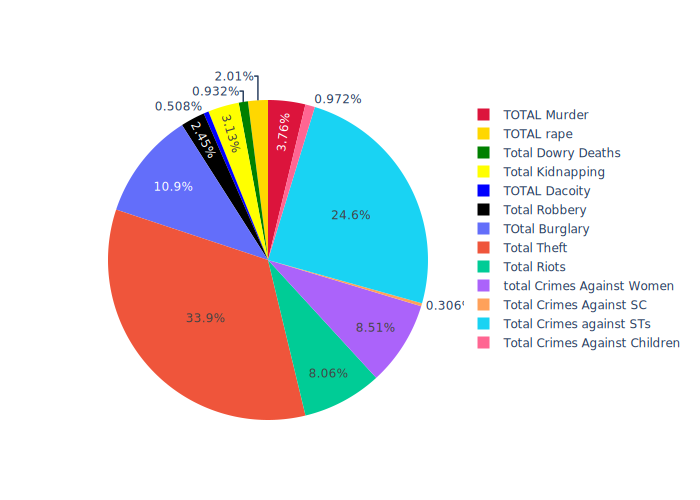

In [64]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [65]:
sensitivearea['STATE/UT'].value_counts()

1.0     12
4.0     12
12.0    12
17.0    12
18.0    12
20.0    12
21.0    12
29.0    12
31.0    12
33.0    12
35.0     6
Name: STATE/UT, dtype: int64

* All States/UT:-

* Eleven states have higher crime rates, with total IPC offenses, total crimes against women, and total crimes against STs and SCs being the most notable.

* Cause of the states' greater crime rates:

* As West Bengal, Maharashtra, Andhra Pradesh, Rajasthan, and Uttar Pradesh are large states with significant population densities, these states have higher crime rates.

* There should be fewer crimes and a greater literacy rate.

In [66]:
sensitivearea['DISTRICT'].value_counts()

244.0    126
Name: DISTRICT, dtype: int64

In [67]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [68]:
sensitivearea_dis.first()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,1.0,2001.0,2602.0,1555.0,136.0,871.0,0.0,871.0,1182.0,417.0,...,15.454757,0.516855,35.416168,0.22067,7.358616,5141.29927,587.267943,14884.821429,185.077519,3


In [69]:
sensitivearea.describe().T

,count,mean,std,min,25%,50%,75%,max
STATE/UT,126.0,19.380952,1.061837e+01,1.000000,12.000000,20.000000,29.000000,35.000000
DISTRICT,126.0,244.000000,0.000000e+00,244.000000,244.000000,244.000000,244.000000,244.000000
YEAR,126.0,2006.642857,3.462864e+00,2001.000000,2004.000000,2007.000000,2010.000000,2012.000000
MURDER,126.0,2272.349206,1.363279e+03,343.000000,1371.000000,2088.500000,2748.500000,7601.000000
ATTEMPT TO MURDER,126.0,2093.103175,1.340693e+03,341.000000,1456.250000,1882.500000,2489.750000,7964.000000
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,126.0,268.341270,4.061171e+02,13.000000,63.250000,111.000000,234.750000,1616.000000
RAPE,126.0,1212.531746,7.931776e+02,236.000000,563.500000,1049.000000,1557.250000,3425.000000
CUSTODIAL RAPE,126.0,0.103175,3.054011e-01,0.000000,0.000000,0.000000,0.000000,1.000000
OTHER RAPE,126.0,1212.428571,7.931854e+02,236.000000,563.500000,1048.500000,1557.250000,3425.000000
KIDNAPPING & ABDUCTION,126.0,1893.722222,1.523569e+03,162.000000,952.250000,1387.000000,2378.250000,8878.000000


# Bar Plotting State versus Total IPC Crime

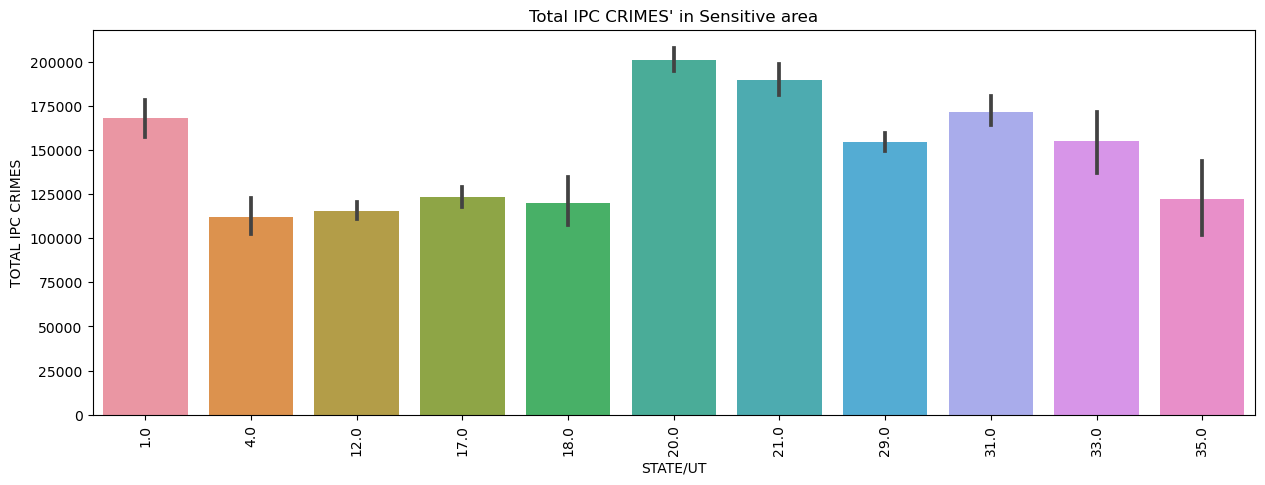

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

# Comparison Between Districts against Total Crimes against Women

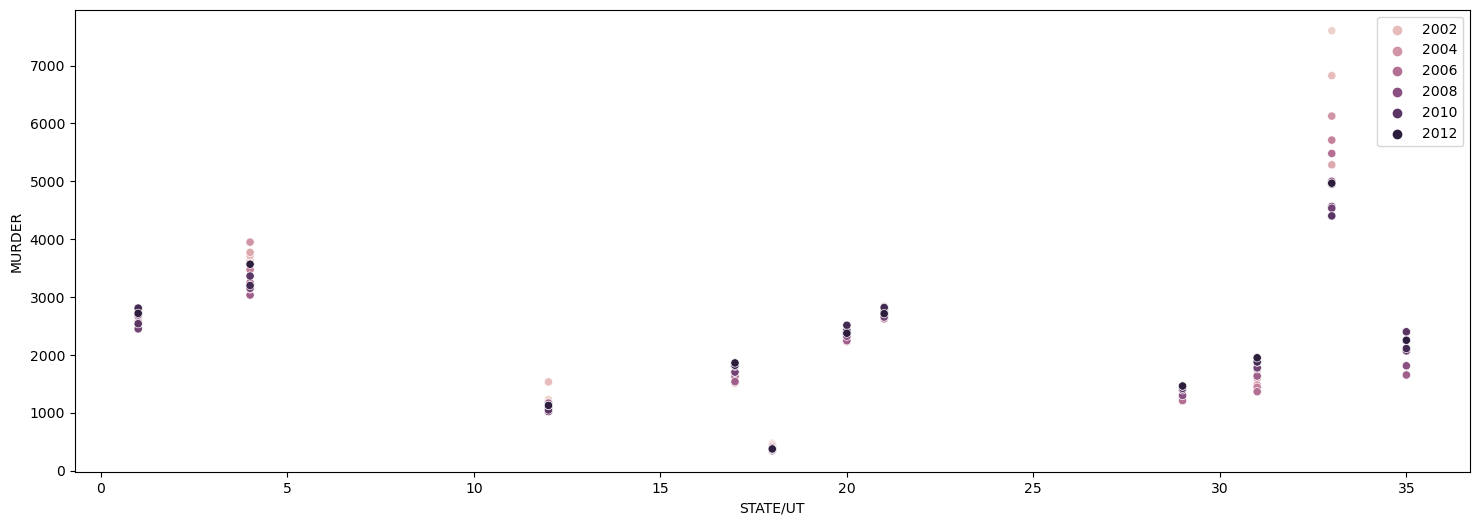

In [71]:
plt.figure(figsize=(18,6))
sns.scatterplot(x = "STATE/UT", y = "MURDER", data = sensitivearea,hue='YEAR')
plt.legend()
#plt.tight_layout()
plt.show()

# From years 2001 to 2012 , lets check the trend for each type of crime:-

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

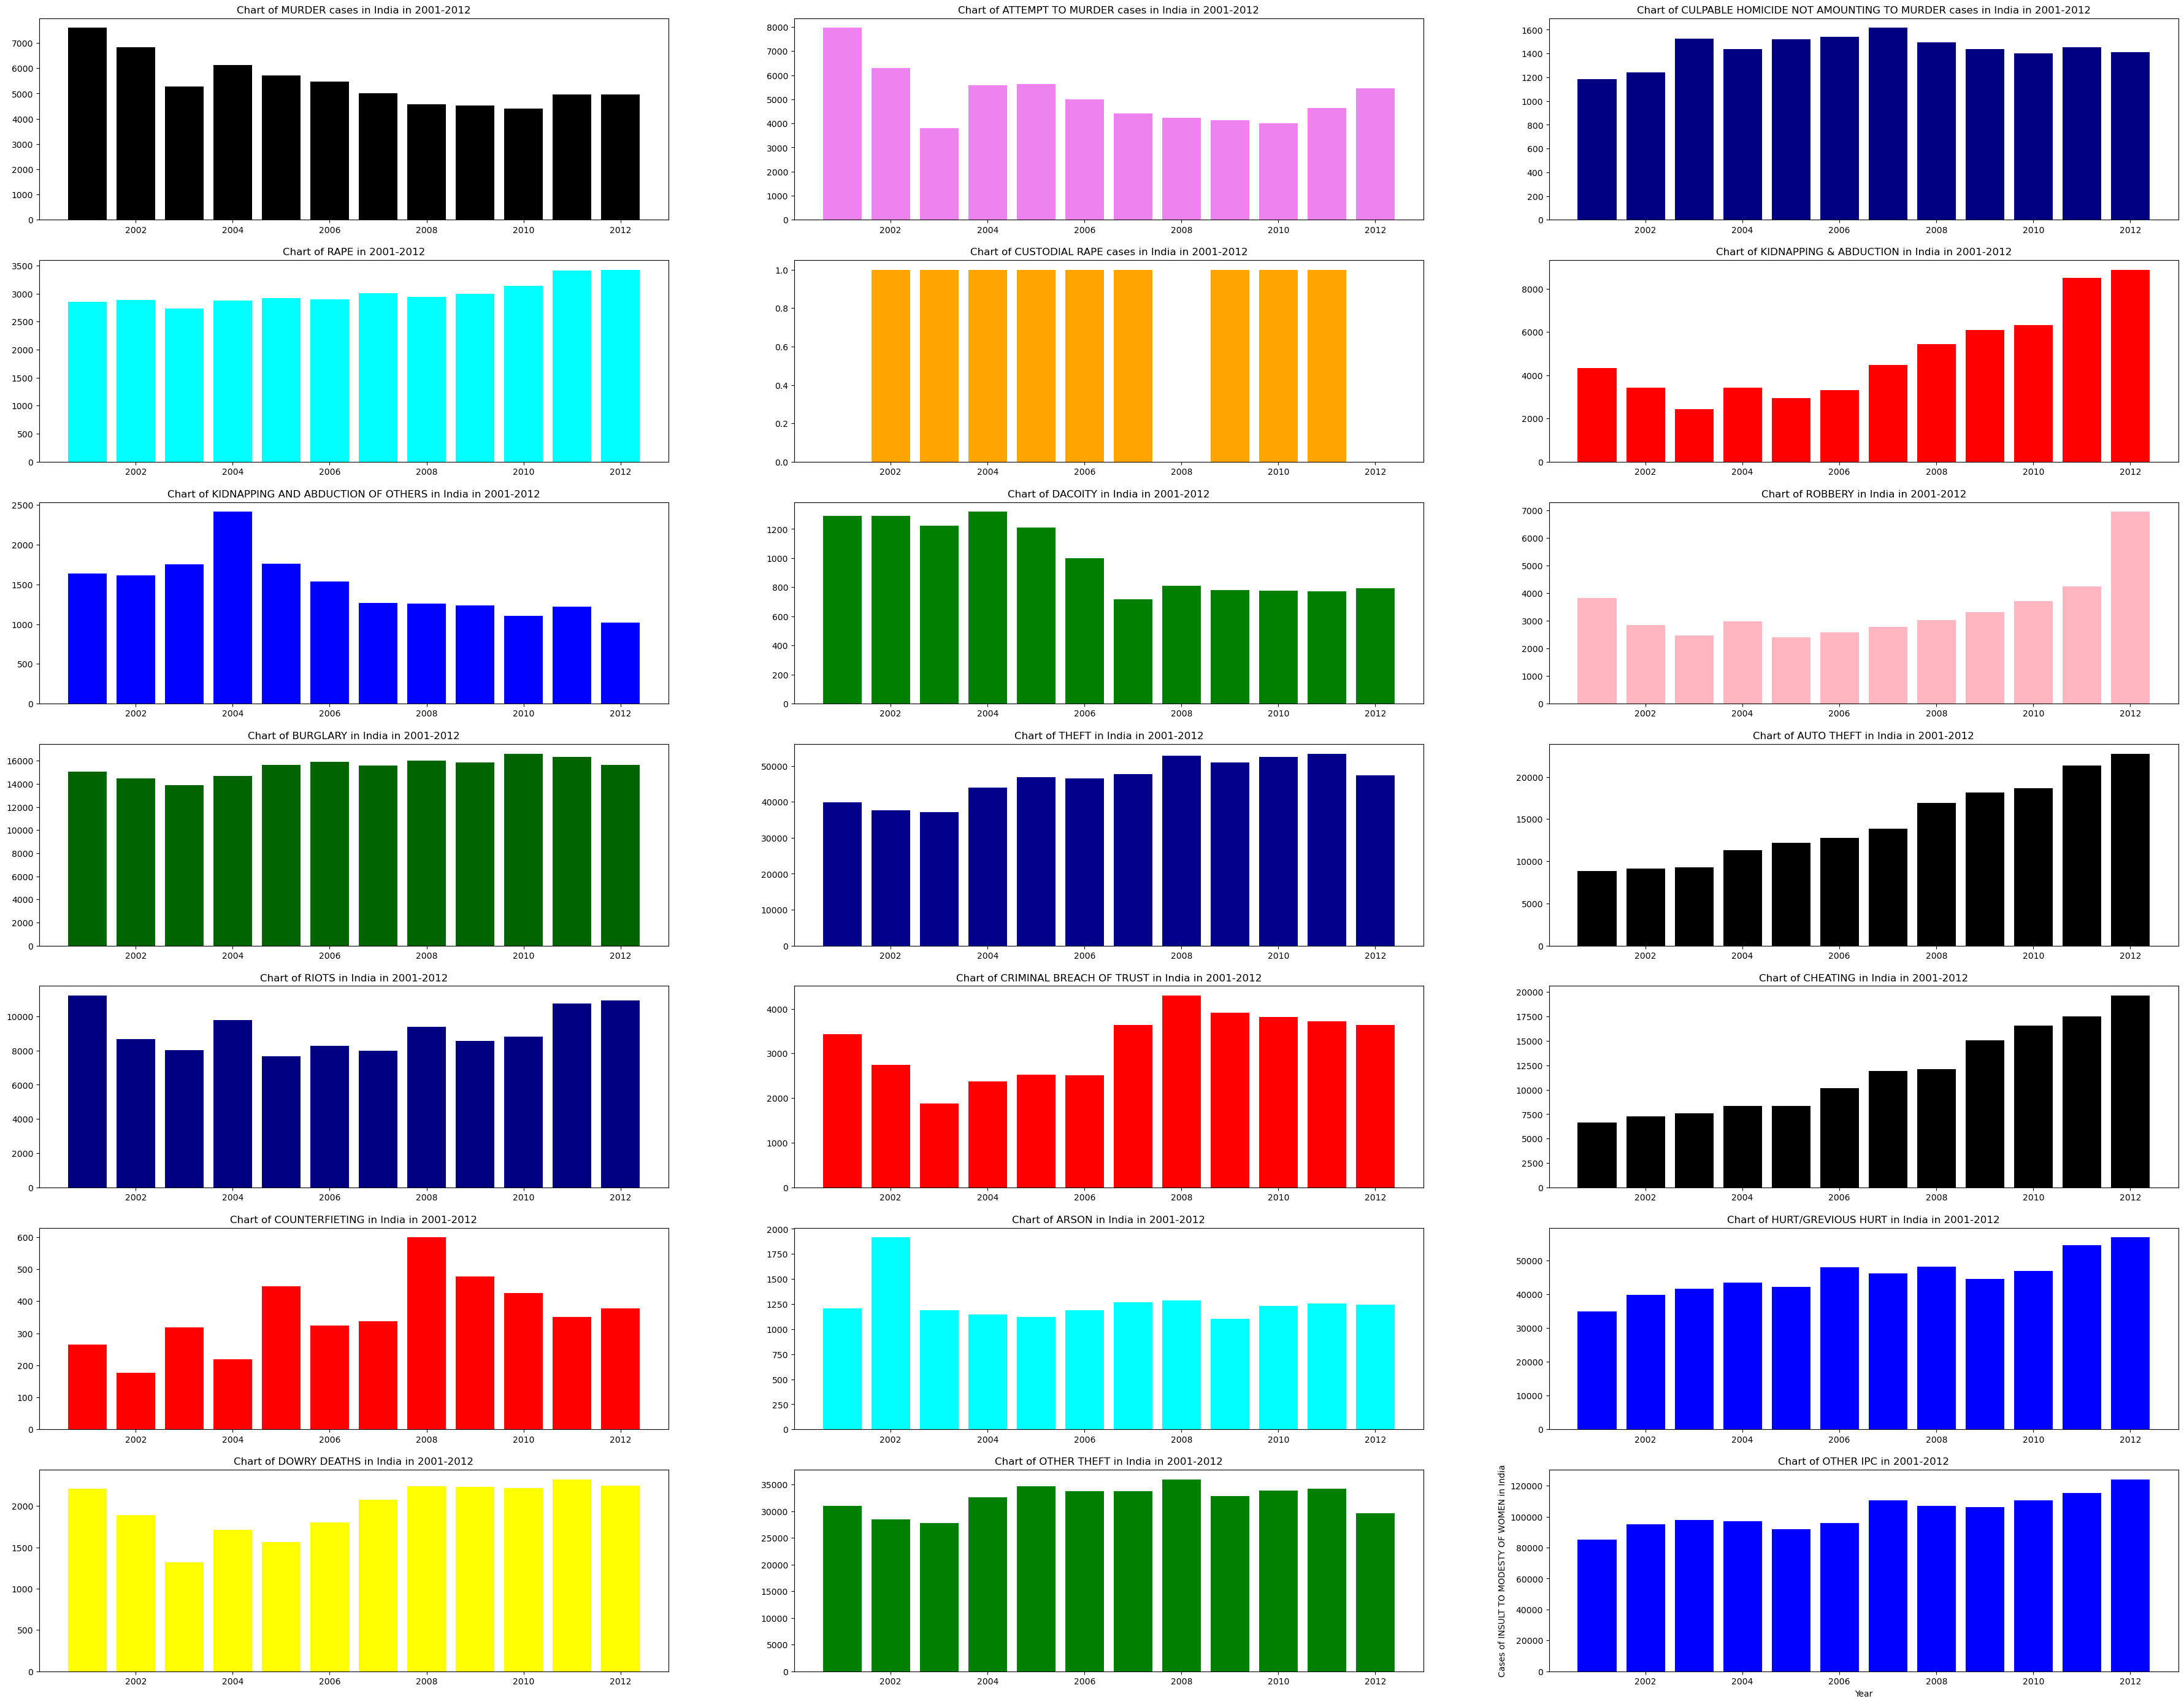

In [72]:
ig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(sensitivearea['YEAR'], sensitivearea['MURDER'], color = 'black');
plt.xlabel('YEAR') #(X-axis)   
plt.ylabel('Cases of MURDER in India') #(Y-axis)

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(sensitivearea['YEAR'], sensitivearea['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #(Y-axis)

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(sensitivearea['YEAR'], sensitivearea['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #(Y-axis)

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(sensitivearea['YEAR'], sensitivearea['RAPE'], color = 'cyan');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of RAPE in India') #(Y-axis)

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(sensitivearea['YEAR'], sensitivearea['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('YEAR') #(X-axis)
plt.ylabel('Cases of CUSTODIAL RAPE in India') #(Y-axis)

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #(Y-axis)

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF OTHERS in India in 2001-2012")
axes[2,0].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING AND ABDUCTION OF OTHERS'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF OTHERSin India') #(Y-axis)


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(sensitivearea['YEAR'], sensitivearea['DACOITY'], color = 'green');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of DACOITY in India') #(Y-axis)

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(sensitivearea['YEAR'], sensitivearea['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ROBBERY in India') #(Y-axis)

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(sensitivearea['YEAR'], sensitivearea['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of BURGLARY in India') #(Y-axis)


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(sensitivearea['YEAR'], sensitivearea['THEFT'], color = 'darkblue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of THEFT in India') #(Y-axis)


axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(sensitivearea['YEAR'], sensitivearea['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of AUTO THEFT in India') #(Y-axis)


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(sensitivearea['YEAR'], sensitivearea['RIOTS'], color = 'navy');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of RIOTS') #(Y-axis)

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(sensitivearea['YEAR'], sensitivearea['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #(Y-axis)


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(sensitivearea['YEAR'], sensitivearea['CHEATING'], color = 'black');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CHEATING in India') #(Y-axis)

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(sensitivearea['YEAR'], sensitivearea['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of COUNTERFIETING in India') #(Y-axis)

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(sensitivearea['YEAR'], sensitivearea['ARSON'], color = 'cyan');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ARSON in India') #(Y-axis)


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(sensitivearea['YEAR'], sensitivearea['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #(Y-axis)

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(sensitivearea['YEAR'], sensitivearea['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of DOWRY DEATHS in India') #(Y-axis)

axes[6,1].set_title("Chart of OTHER THEFT in India in 2001-2012")
axes[6,1].bar(sensitivearea['YEAR'], sensitivearea['OTHER THEFT'], color = 'green');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of OTHER THEFT in India') #(Y-axis)

axes[6,2].set_title("Chart of OTHER IPC in 2001-2012")
axes[6,2].bar(sensitivearea['YEAR'], sensitivearea['OTHER IPC CRIMES'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #(Y-axis)

# Checking Correlationship in Sensitive rea dataframe:-

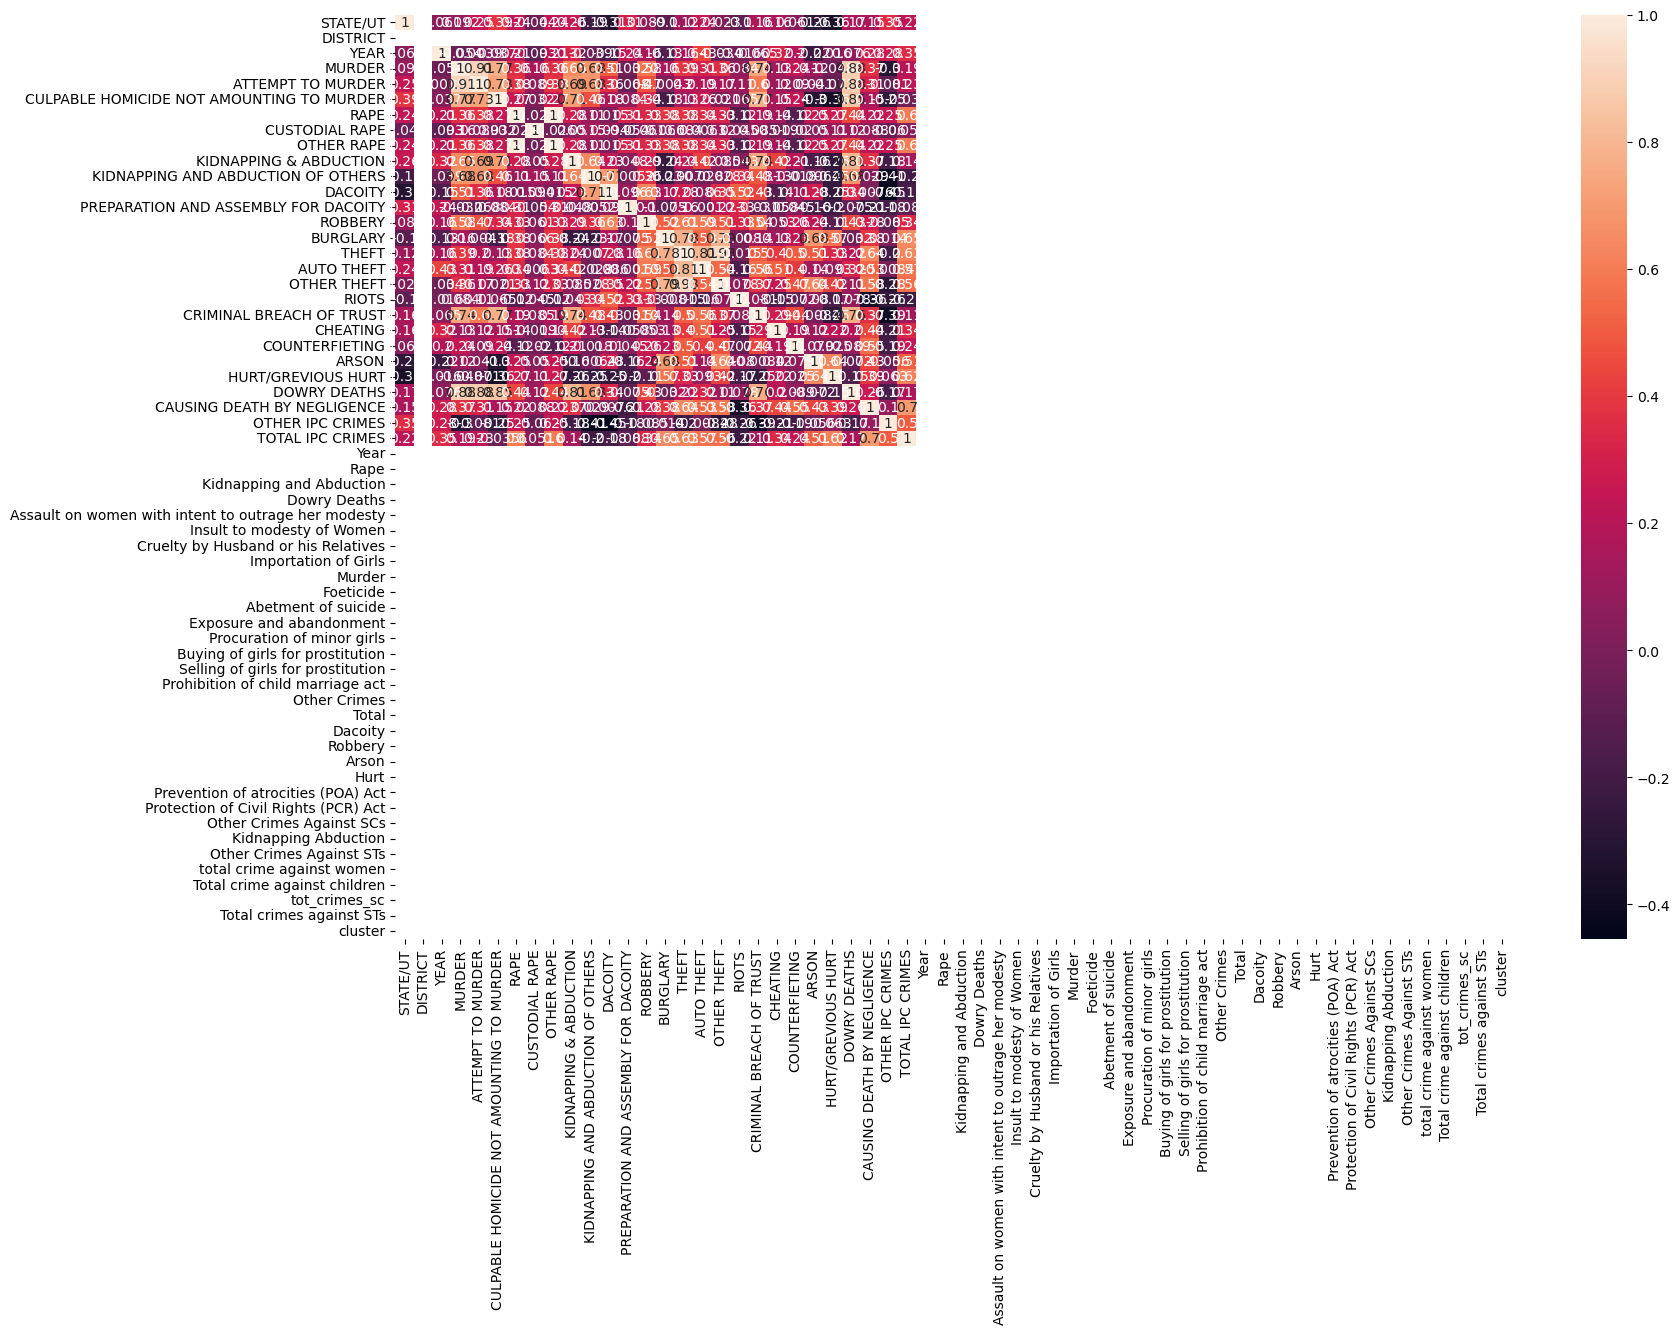

In [75]:
plt.figure(figsize=(18,12))
sns.heatmap(sensitivearea.corr(),annot=True)
plt.savefig('heatmap2.jpg')
plt.show()

The heatmap is created using seaborn to observe the correlation between the variables. The created correlation matrix shows the single correlation between each feature with other features on the dataset.

If 2 variables are correlated to each other by:

* 0.0 to 0.3, they are weakly correlated,

* 0.3 to 0.6, they are moderately correlated,

* 0.6 to 0.9, they are strongly correlated,

* finally, >0.9, they are very strongly correlated

Positive and negative indicates whether the variables are directly or inversely related e.g. a correlation of -0.7 between 2 variables denote that if one variable increases, the other decreases strongly (as defined in the list above)

* From above heat map we can clerly see that all the categories of crimes like Murder,Rape , Dowry Deaths are positively correlated with TOTAL IPC CRIMES

* KIdnapping and Abduction and Other Rape/Rape are also positvely correlated

* Crime against STs and Crime Against SCs are also positive correalted

# Analysis of Moderate Area:-

In [76]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total', 'Dacoity',
       'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Kidnapping Abduction', 'Other Crimes Against STs',
       'total crime against women', 'Total crime against children',
       'tot_crimes_sc', 'Total crimes against STs'], index =['STATE/UT','DISTRICT','YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT DISTRICT YEAR                                                    
0.0      2.0      2006.629206  25.190894          77.587674  268.042532   
                  2007.000000  11.000000          19.000000    8.000000   
         31.0     2001.000000   4.000000           0.000000    4.000000   
                  2002.000000   2.000000           3.000000    2.000000   
                  2003.000000   7.000000           4.000000    3.000000   
...                                  ...                ...         ...   
35.0     787.0    2008.000000  17.000000          98.000000   53.000000   
                  2009.000000  11.000000          86.000000   89.000000   
                  2010.000000  10.000000         106.000000  114.000000   
                  2011.000000  20.000000         178.000000  119.000000   
                  2012.000000  33.000000         283.000000  129.000000   

                               Abetment of suicide     Arson  \
STATE/UT DISTRICT YEAR                                         
0.0      2.0      2006.629206             0.123903  0.360169   
                  2007.000000             0.123903  0.360169   
         31.0     2001.000000             0.123903  0.360169   
                  2002.000000             0.123903  0.360169   
                  2003.000000             0.123903  0.360169   
...                                            ...       ...   
35.0     787.0    2008.000000             0.123903  0.360169   
                  2009.000000             0.123903  0.360169   
                  2010.000000             0.123903  0.360169   
                  2011.000000             0.123903  0.360169   
                  2012.000000             0.123903  0.360169   

                               Assault on women with intent to outrage her modesty  \
STATE/UT DISTRICT YEAR                                                               
0.0      2.0      2006.629206                                          99.808551     
                  2007.000000                                          99.808551     
         31.0     2001.000000                                          99.808551     
                  2002.000000                                          99.808551     
                  2003.000000                                          99.808551     
...                                                                          ...     
35.0     787.0    2008.000000                                          99.808551     
                  2009.000000                                          99.808551     
                  2010.000000                                          99.808551     
                  2011.000000                                          99.808551     
                  2012.000000                                          99.808551     

                                BURGLARY  Buying of girls for prostitution  \
STATE/UT DISTRICT YEAR                                                       
0.0      2.0      2006.629206  245.54392                          0.075008   
                  2007.000000   90.00000                          0.075008   
         31.0     2001.000000   62.00000                          0.075008   
                  2002.000000   47.00000                          0.075008   
                  2003.000000   56.00000                          0.075008   
...                                  ...                               ...   
35.0     787.0    2008.000000   10.00000                          0.075008   
                  2009.000000    8.00000                          0.075008   
                  2010.000000    4.00000                          0.075008   
                  2011.000000   10.00000                          0.075008   
                  2012.000000    7.00000                          0.075008   

                               CAUSING DEATH BY NEGLIGENCE  CHEATING  ...  \
STATE/UT DISTRI

In [77]:
print("We have {} Rows and {} Columns in our dataframe Moderate Area ".format(moderatearea.shape[0], moderatearea.shape[1]))

We have 45340 Rows and 60 Columns in our dataframe Moderate Area 


In [78]:
moderatearea['STATE/UT'].value_counts()

33.0    4788
20.0    3128
21.0    2748
4.0     2687
31.0    2333
29.0    2258
26.0    2150
17.0    1983
12.0    1908
1.0     1838
3.0     1809
15.0    1612
28.0    1570
16.0    1560
35.0    1539
13.0    1340
6.0     1327
18.0    1153
2.0      975
14.0     880
34.0     840
9.0      715
25.0     693
22.0     625
24.0     540
23.0     480
32.0     335
30.0     300
11.0     180
0.0      180
8.0      180
10.0     171
27.0     155
5.0      120
7.0      120
19.0     120
Name: STATE/UT, dtype: int64

In [79]:
moderatearea['DISTRICT'].value_counts()

244.0    2584
719.0     185
558.0     185
814.0     180
615.0     172
         ... 
48.0        1
258.0       1
379.0       1
22.0        1
620.0       1
Name: DISTRICT, Length: 822, dtype: int64

In [80]:
moderatearea.describe().T

,count,mean,std,min,25%,50%,75%,max
STATE/UT,45340.0,19.338178,10.590888,0.0,12.000000,20.000000,29.000000,35.000000
DISTRICT,45340.0,404.343494,233.761756,0.0,218.000000,394.000000,606.000000,821.000000
YEAR,45340.0,2006.629168,1.532779,2001.0,2006.629206,2006.629206,2006.629206,2012.000000
MURDER,45340.0,82.646944,53.277418,0.0,88.715269,88.715269,88.715269,1747.000000
ATTEMPT TO MURDER,45340.0,71.986550,44.704308,0.0,77.587674,77.587674,77.587674,1879.000000
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,45340.0,9.092203,7.901934,0.0,9.810661,9.810661,9.810661,581.000000
RAPE,45340.0,49.174654,41.055128,0.0,52.398667,52.398667,52.398667,1731.000000
CUSTODIAL RAPE,45340.0,0.005504,0.048544,0.0,0.005775,0.005775,0.005775,5.000000
OTHER RAPE,45340.0,49.169150,41.047602,0.0,52.392893,52.392893,52.392893,1731.000000
KIDNAPPING & ABDUCTION,45340.0,71.421927,56.013584,0.0,76.472071,76.472071,76.472071,3812.000000


* We can see min , max, of each crime that is MURDER,RAPE,IPC, TOTAL IPC CRIMES , Total crime agianst women, crime against STs, SCs. __This is the data from 2001 t0 2012 and in this cluster Maximum value is lower than the maximum value of sensitivearea cluster.

# State/UT Vs TOTAL IPC CRIMES:-

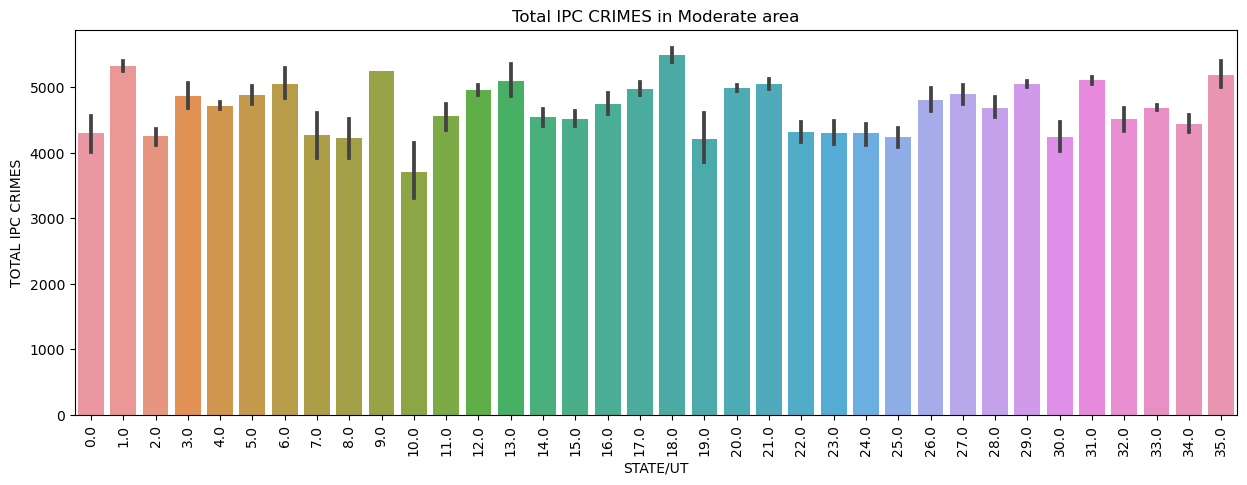

In [81]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()

* Kearala Is the state which is more senstive towards TOTAL IPC CRIME

# STATE/UT vs Total crimes against women:-

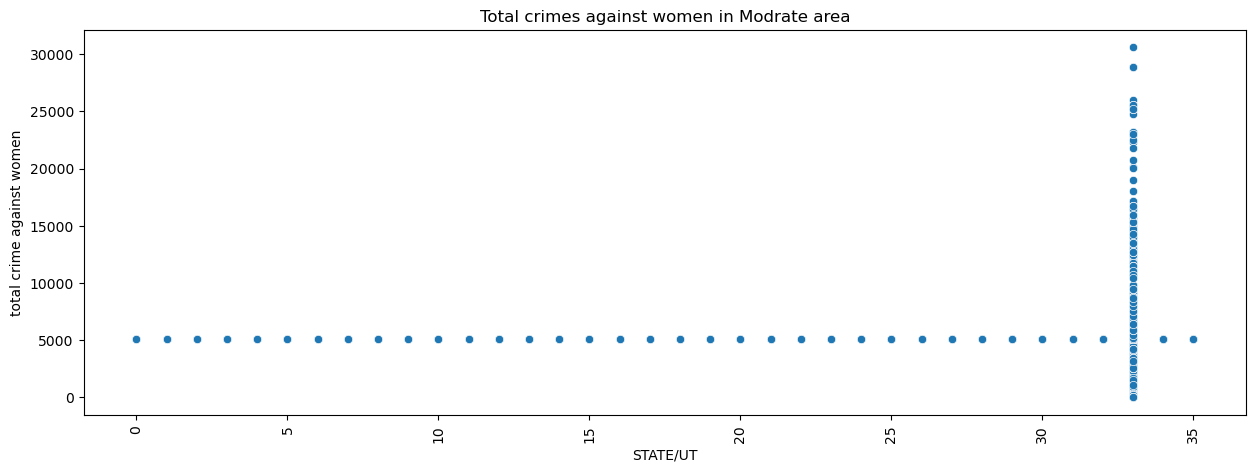

In [82]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='total crime against women',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Modrate area")
plt.savefig('Total crimes against womenin Moderate area.jpg')
plt.show()

# STATE/UT vs Total crimes against SCs:-

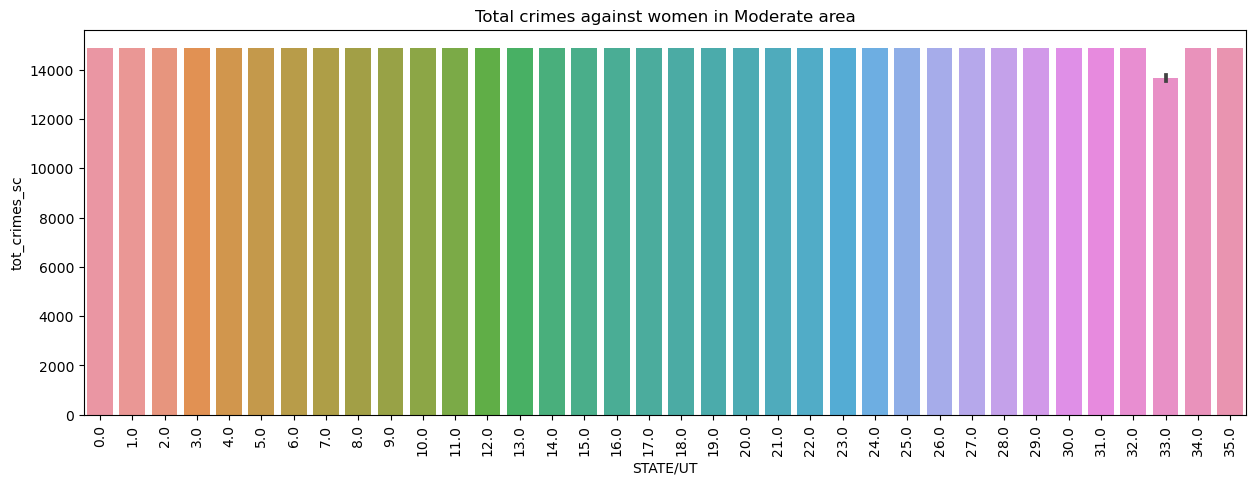

In [83]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='tot_crimes_sc',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()

# State/UT vs Total crimes against STs:-

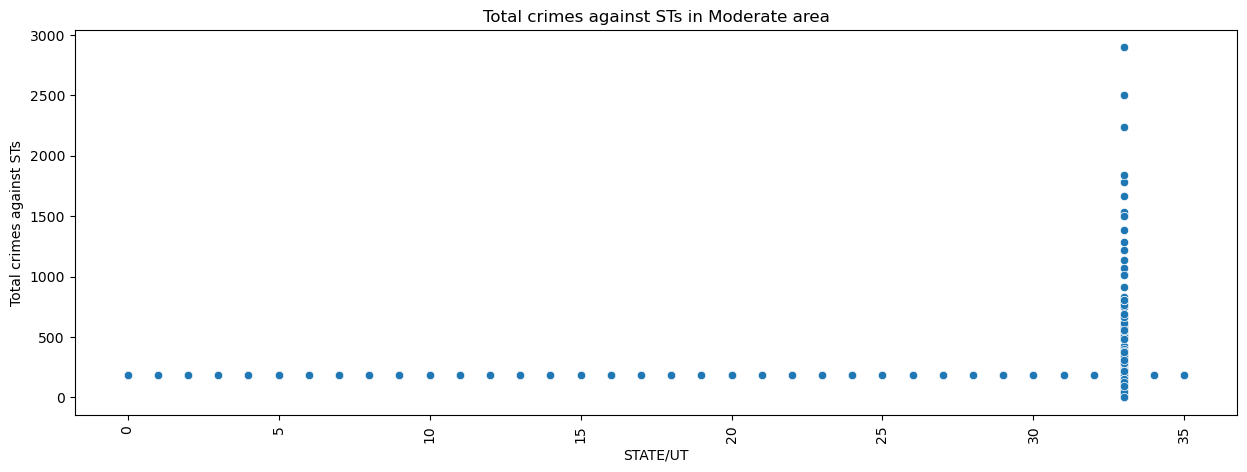

In [84]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Total crimes against STs',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against STs in Moderate area")
plt.savefig('Total crimes against STs in Moderate area.jpg')

plt.show()

# Plotting Pie chart to chck percentage of each crime in the Moderatearea dataset:-

In [85]:
tot_murder= moderatearea['MURDER'].sum()
tot_rape= moderatearea['RAPE'].sum()
tot_dowrydeaths = moderatearea['DOWRY DEATHS'].sum()

tot_kidnap= moderatearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= moderatearea['DACOITY'].sum()
tot_robbery = moderatearea['ROBBERY'].sum()
tot_burglary= moderatearea['BURGLARY'].sum()
tot_theft= moderatearea['THEFT'].sum()
tot_crimes_against_women = moderatearea['total crime against women'].sum()
tot_crimes_against_STs = moderatearea['Total crimes against STs'].sum()
tot_crimes_against_SCs = moderatearea['tot_crimes_sc'].sum()
tot_crimes_against_children = moderatearea['Total crime against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'total Crime Against Women','tot_crimes_sc','Total crimes against STs','Total crime against children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

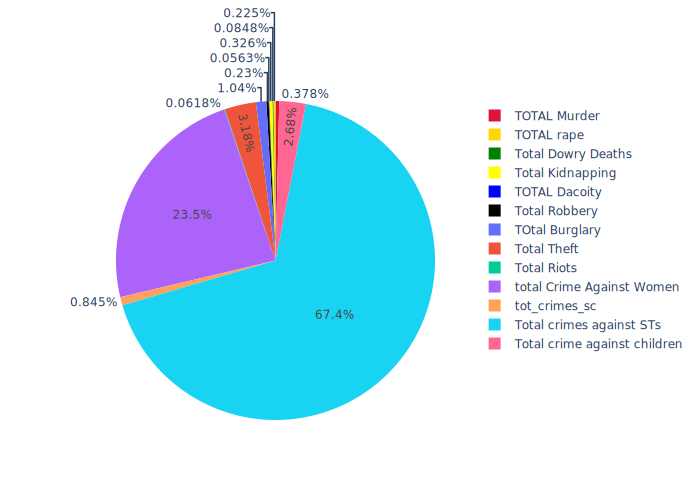

In [86]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [87]:
moderatearea.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
0.0,35.0,2001.000000,88.715269,6.000000,9.810661,52.398667,0.000000,52.392893,76.472071,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
1.0,35.0,2001.000000,88.715269,2.000000,9.810661,47.000000,0.000000,47.000000,53.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
2.0,0.0,2006.629206,15.000000,19.000000,1.000000,3.000000,0.000000,3.000000,12.000000,3.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,5141.29927,587.267943,14884.821429,185.077519,1
3.0,1.0,2001.000000,73.000000,39.000000,8.000000,35.000000,0.000000,35.000000,41.000000,6.000000,...,0.000000,0.000000,10.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
4.0,33.0,2001.000000,88.715269,77.587674,9.810661,26.000000,0.000000,26.000000,76.472071,19.596557,...,0.000000,0.000000,35.416168,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817.0,17.0,2006.629206,23.000000,21.000000,0.000000,5.000000,0.000000,5.000000,20.000000,2.000000,...,9.000000,0.000000,30.000000,0.00000,7.358616,5141.29927,587.267943,14884.821429,185.077519,1
818.0,13.0,2001.000000,21.000000,14.000000,0.000000,12.000000,0.000000,12.000000,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5141.29927,587.267943,14884.821429,185.077519,1
819.0,21.0,2001.000000,56.000000,43.000000,1.000000,33.000000,0.000000,33.000000,28.000000,1.000000,...,0.000000,0.000000,4.000000,0.00000,4.000000,5141.29927,587.267943,14884.821429,185.077519,1


* Lets check the area which have highest Numbers of Total Theft and Riots:-

In [88]:
moderatearea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
379.0    7.517506e+02
620.0    7.517506e+02
48.0     7.517506e+02
22.0     7.517506e+02
258.0    7.517506e+02
             ...     
558.0    1.245151e+05
814.0    1.374981e+05
63.0     1.415180e+05
719.0    1.501501e+05
244.0    2.415823e+06
Name: THEFT, Length: 822, dtype: float64

In [89]:
moderatearea.loc[moderatearea['DISTRICT'] == 'SOUTH'].max()

STATE/UT                                              NaN
DISTRICT                                              NaN
YEAR                                                  NaN
MURDER                                                NaN
ATTEMPT TO MURDER                                     NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER             NaN
RAPE                                                  NaN
CUSTODIAL RAPE                                        NaN
OTHER RAPE                                            NaN
KIDNAPPING & ABDUCTION                                NaN
KIDNAPPING AND ABDUCTION OF OTHERS                    NaN
DACOITY                                               NaN
PREPARATION AND ASSEMBLY FOR DACOITY                  NaN
ROBBERY                                               NaN
BURGLARY                                              NaN
THEFT                                                 NaN
AUTO THEFT                                            NaN
OTHER THEFT   

In [90]:
moderatearea.groupby('DISTRICT')['RIOTS'].sum().sort_values()

DISTRICT
48.0        171.999778
379.0       171.999778
258.0       171.999778
620.0       171.999778
22.0        171.999778
             ...      
615.0     23899.969572
814.0     25778.968018
558.0     25800.967129
719.0     26288.967129
244.0    548726.498945
Name: RIOTS, Length: 822, dtype: float64

In [91]:
moderatearea.loc[moderatearea['DISTRICT'] == 'KANNUR'].max()

STATE/UT                                              NaN
DISTRICT                                              NaN
YEAR                                                  NaN
MURDER                                                NaN
ATTEMPT TO MURDER                                     NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER             NaN
RAPE                                                  NaN
CUSTODIAL RAPE                                        NaN
OTHER RAPE                                            NaN
KIDNAPPING & ABDUCTION                                NaN
KIDNAPPING AND ABDUCTION OF OTHERS                    NaN
DACOITY                                               NaN
PREPARATION AND ASSEMBLY FOR DACOITY                  NaN
ROBBERY                                               NaN
BURGLARY                                              NaN
THEFT                                                 NaN
AUTO THEFT                                            NaN
OTHER THEFT   

In [92]:
moderatearea['STATE/UT'].value_counts()

33.0    4788
20.0    3128
21.0    2748
4.0     2687
31.0    2333
29.0    2258
26.0    2150
17.0    1983
12.0    1908
1.0     1838
3.0     1809
15.0    1612
28.0    1570
16.0    1560
35.0    1539
13.0    1340
6.0     1327
18.0    1153
2.0      975
14.0     880
34.0     840
9.0      715
25.0     693
22.0     625
24.0     540
23.0     480
32.0     335
30.0     300
11.0     180
0.0      180
8.0      180
10.0     171
27.0     155
5.0      120
7.0      120
19.0     120
Name: STATE/UT, dtype: int64

# Analysis Peaceful Area Cluster:-

In [93]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total', 'Dacoity',
       'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Kidnapping Abduction', 'Other Crimes Against STs',
       'total crime against women', 'Total crime against children',
       'tot_crimes_sc', 'Total crimes against STs'], index =['STATE/UT','DISTRICT','YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT DISTRICT YEAR                                            
1.0      244.0    2001.0   872.0             1555.0      3051.0   
                  2002.0   991.0             1644.0      3544.0   
                  2003.0  1049.0             1678.0      4521.0   
                  2004.0   915.0             1908.0      5042.0   
                  2005.0   967.0             1724.0      5465.0   
...                          ...                ...         ...   
35.0     244.0    2008.0   150.0             1732.0      2593.0   
                  2009.0   344.0             2119.0      3709.0   
                  2010.0   331.0             2111.0      4123.0   
                  2011.0   413.0             2242.0      4642.0   
                  2012.0   396.0             2854.0      5158.0   

                          Abetment of suicide     Arson  \
STATE/UT DISTRICT YEAR                                    
1.0      244.0    2001.0             0.123903  0.360169   
                  2002.0             0.123903  0.360169   
                  2003.0             0.123903  0.360169   
                  2004.0             0.123903  0.360169   
                  2005.0             0.123903  0.360169   
...                                       ...       ...   
35.0     244.0    2008.0             0.123903  0.360169   
                  2009.0             0.123903  0.360169   
                  2010.0             0.123903  0.360169   
                  2011.0             0.123903  0.360169   
                  2012.0             0.123903  0.360169   

                          Assault on women with intent to outrage her modesty  \
STATE/UT DISTRICT YEAR                                                          
1.0      244.0    2001.0                                          99.808551     
                  2002.0                                          99.808551     
                  2003.0                                          99.808551     
                  2004.0                                          99.808551     
                  2005.0                                          99.808551     
...                                                                     ...     
35.0     244.0    2008.0                                          99.808551     
                  2009.0                                          99.808551     
                  2010.0                                          99.808551     
                  2011.0                                          99.808551     
                  2012.0                                          99.808551     

                          BURGLARY  Buying of girls for prostitution  \
STATE/UT DISTRICT YEAR                                                 
1.0      244.0    2001.0    7220.0                          0.075008   
                  2002.0    7628.0                          0.075008   
                  2003.0    9050.0                          0.075008   
                  2004.0    8457.0                          0.075008   
                  2005.0    7954.0                          0.075008   
...                            ...                               ...   
35.0     244.0    2008.0     462.0                          0.075008   
                  2009.0     329.0                          0.075008   
                  2010.0     388.0                          0.075008   
                  2011.0     455.0                          0.075008   
                  2012.0     464.0                          0.075008   

                          CAUSING DEATH BY NEGLIGENCE  CHEATING  ...  ROBBERY  \
STATE/UT DISTRICT YEAR                                           ...            
1.0      244.0    2001.0                       7400.0    5391.0  ...    629.0   
                  2002.0                       8691.0    6733.0  ...    648.0   
                  2003.0                       8515.0    7581.0  ...    

In [94]:
print("We have {} Rows and {} Columns in our dataframe Peaceful Area ".format(peacefularea.shape[0], peacefularea.shape[1]))

We have 10 Rows and 60 Columns in our dataframe Peaceful Area 


In [95]:
peacefularea['STATE/UT'].value_counts()

33.0    10
Name: STATE/UT, dtype: int64

In [96]:
peacefularea['DISTRICT'].value_counts()

244.0    10
Name: DISTRICT, dtype: int64

In [97]:
peacefularea.describe().T

,count,mean,std,min,25%,50%,75%,max
STATE/UT,10.0,33.000000,0.000000e+00,33.000000,33.000000,33.000000,33.000000,33.000000
DISTRICT,10.0,244.000000,0.000000e+00,244.000000,244.000000,244.000000,244.000000,244.000000
YEAR,10.0,2006.629206,0.000000e+00,2006.629206,2006.629206,2006.629206,2006.629206,2006.629206
MURDER,10.0,88.715269,1.497956e-14,88.715269,88.715269,88.715269,88.715269,88.715269
ATTEMPT TO MURDER,10.0,77.587674,1.497956e-14,77.587674,77.587674,77.587674,77.587674,77.587674
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,10.0,9.810661,1.872445e-15,9.810661,9.810661,9.810661,9.810661,9.810661
RAPE,10.0,52.398667,1.497956e-14,52.398667,52.398667,52.398667,52.398667,52.398667
CUSTODIAL RAPE,10.0,0.005775,9.142795e-19,0.005775,0.005775,0.005775,0.005775,0.005775
OTHER RAPE,10.0,52.392893,0.000000e+00,52.392893,52.392893,52.392893,52.392893,52.392893
KIDNAPPING & ABDUCTION,10.0,76.472071,1.497956e-14,76.472071,76.472071,76.472071,76.472071,76.472071


# State/UT Vs TOTAL IPC CRIMES:-

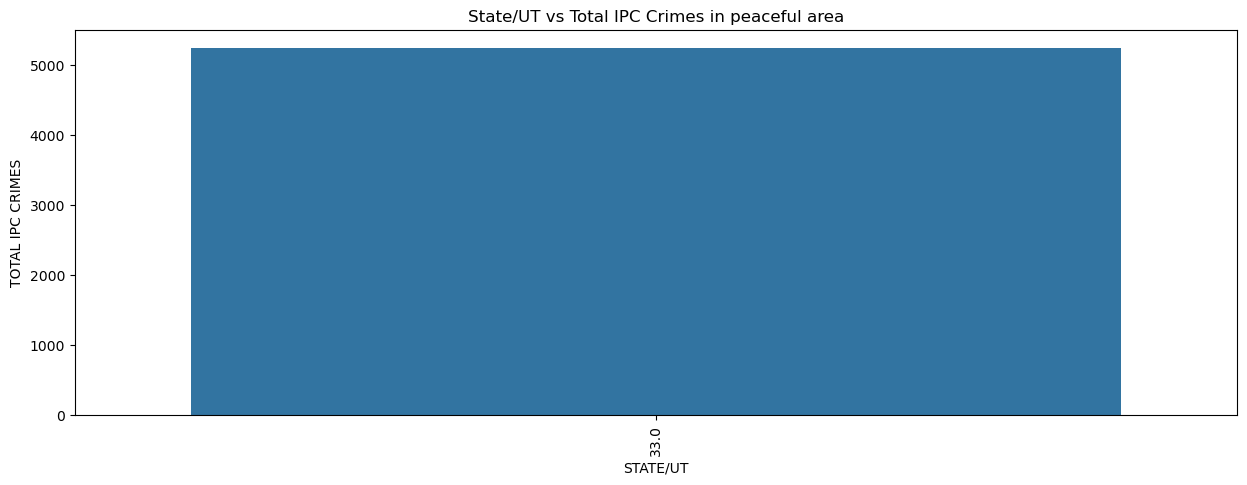

In [98]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation=90)
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()

In [99]:
tot_murder= peacefularea['MURDER'].sum()
tot_rape= peacefularea['RAPE'].sum()
tot_dowrydeaths = peacefularea['DOWRY DEATHS'].sum()

tot_kidnap= peacefularea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= peacefularea['DACOITY'].sum()
tot_robbery = peacefularea['ROBBERY'].sum()
tot_burglary= peacefularea['BURGLARY'].sum()
tot_theft= peacefularea['THEFT'].sum()
tot_crimes_against_women = peacefularea['total crime against women'].sum()
tot_crimes_against_STs = peacefularea['Total crimes against STs'].sum()
tot_crimes_against_SCs = peacefularea['tot_crimes_sc'].sum()
tot_crimes_against_children = peacefularea['Total crime against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Total Crimes Against Women','tot_crimes_sc','Total crimes against STs','Total crime against children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

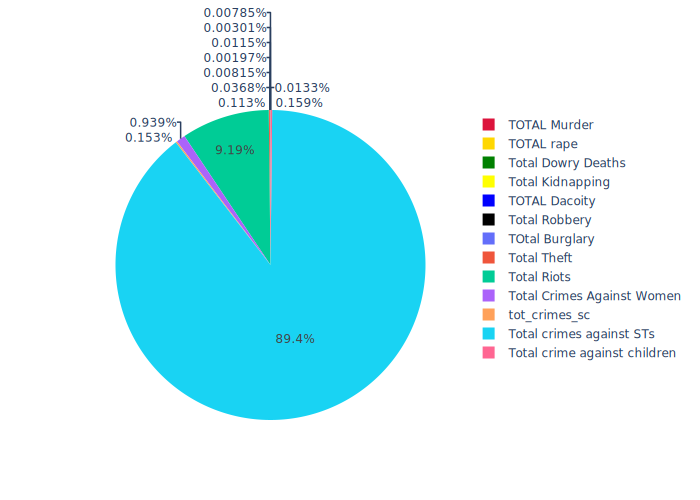

In [101]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [102]:
peacefularea.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Kidnapping Abduction,Other Crimes Against STs,total crime against women,Total crime against children,tot_crimes_sc,Total crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
244.0,33.0,2006.629206,88.715269,77.587674,9.810661,52.398667,0.005775,52.392893,76.472071,19.596557,...,15.454757,0.516855,35.416168,0.22067,7.358616,1906.0,204.0,542551.0,185.077519,2


In [103]:
peacefularea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
244.0    7517.50583
Name: THEFT, dtype: float64

In [105]:
peacefularea['DISTRICT'].max()

244.0

# silhouette_score:-

In [107]:
silhouette_score(X,y_kmeans)#data and cluster

0.9871024563347421

# 4.3"Analyse your clusters and prepare a report that explains all your observations.:-

# * States in Sensitve area- Total rows 140 and columns 32.

As per this Cluster Crimes are the highest in every state. __West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu __has shown more crime against any categories.Means these are the states which are not that much safe and are highly prone to crimes .

* DISTRICTS LIKE HYDERABAD CITY,AHMEDABAD COMMR, BANGALORE COMMR. ,PATNA , KOLKATA , CYBERABAD ,LUCKNOW PUNE COMMR. ,MUMBAI COMMR. ,24 PARGANAS NORTH INDORE , 24 PARGANAS SOUTH ,THANE COMMR. , JAIPUR ,MUMBAI , MURSHIDABAD ,NORTH-WEST,NADA,AGRA ,CHENNAI ,GHAZIABAD ,SOUTH ,JALPAIGURI ,KANPUR NAGAR ,NORTH WEST ,ALWAR Are the Districts which are not safe.

* As we can See the States Like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu are the larger States Population wise and Area wise as well. Population is one of the important factors influencing incidence of crime. A number of socio-economic factors, besides population, could influence the crime situation at a particular place. The present analysis of crime rate is restricted to the influence of population only.

# States in Moderate area- Total 2350 Rows and 33 Columns-

As per this Cluster Moderate area is that area where Crimes are less than Sensitive area but higher than Peaceful area.

* States West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu are still showing higher crimes in every categories, But the states like Tripura, Punjab, Jharkhand, Odisha , Haryana , Jammu & Kashmir are also present in this dtaset which showing moderate crimes in each category.

# States in Peaceful area- Total 6106 Rows and 33 Columns-

As per this Cluster Peaceful area is that area where Crimes are less than both Sensitive and Moderate area.

* Whenever there is higher crime showing in each category we found the states like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan are showing higher crime values. But in lesser cimes States like Mizoram, Tripura, Manipur,GOA, Assam , Arunachal Pradesh, Sikkim,Nagaland,Uttarakhand,Daman & Diu, Dadar and Nagar Haveli, A7 N Islands, Puducheery, Chandigarh, Lakshdweep (Union Territories ) started showing data.
* Peacefularea is the dataframe which consist of Lowest crimes count in each category of crime so when we analyzed each crime we saw entries from States which are having the lowest crimes.

As per the analysis of above clusters-
Sensitive States- Maharashtra, Rajasthan, Uttar Pradesh, DELHI,West Bengal, Tamil Nadu, Andhra Pradesh, Madhya Pradesh, Bihar.
Moderate States- Uttarakhand, Kerala, Goa,Jharkhand, Karnataka,Chhatisgarh, Haryana, Himachal Pradesh
Peaceful States - Sikkim, Mizoram ,Tripua, Manipur, Assam,Nagaland, A &N Islands, Lakshdweep,Meghlaya,Arunachal Pradesh

* Literacy can make any country better so if we educate more people around us we can stop these crimes day by day andcan make our Country a better place to live.

* Schemes Indian Government, at all levels, announced Welfare Schemes for a cross section of the society from time to time. These schemes could be either Central, State specific or a joint collaboration between the Centre and the States.By Encouraging people to join these programs can help people to become beeter in life.

* Many women and child development schemes has benn announced like- Women's Empowerment and Gender Equity.POSHAN Abhiyaan.,Anganwadi Services.,Pradhan Mantri Matru Vandana Yojana (PMMVY) ,Beti Bachao Beti Padhao (BBBP) ,One Stop Centre (OSC) and Universalization of Women Helplines(WHL),hild Protection Services (CPS),Scheme for Adolescent Girls (SAG) so women of Rural area are also should be encouraged to join these programs.

# 4.4 Capstone project overall story in your own words. Min 1000 words:-

In the duration of 3 weeeks we were asked to given submission of this Capston Project that is - Crimes in India. We were already given the data (10 CSV files which were compireses of States/UR, District , Year(2001- 2012) and Diffrent Crime head.And we were asked to collect the data on

* The population of each state.
* Literacy Rate in each state
* Area of each state Initially I was Confuse about data collection part as but as soon as I started working on this Project I Start to understand and made some assumption as Population, Litercay rate that was given only for 2001 and 2011 so I calculated the growth rate and found the Population, Litercay rate for Every State per year.

It took so long as I added Few columns for my analysis in the dataset like Population in Rural/Urban Area, Total male, Tota Female, Population Litercay, Male Literacy, Female Literacy, Area of each state and Diiferent Crimes Head Like Murdeer, Riots, DOwry deaths, Raes, Arson, Total Crimes against Women/Children/SCs/STs,

After colecting data from 2001 to 2012 for each column I entered in to Second Phase .

* Phase 2 was about Analysis of State/Ut wise for diiferent Crimes and found the States/UT which were prone to crimes and which were less prone to crimes.I USed Different Plots and charts to analyse the dataset .

* I read the csv file , saved into dataframe and checked for Info(), null value and proccesded accordingly.

* I came to know about the plotly library in python which made my plots so interactable. Plotted Different Charts, Barplot, Scaaterplots, Line Plots and wrote down my analysis.

* I also calculatd Crime rate for each state from 2001 to 2012 and

* Phase 3 is about SQL Opertaion - Insertion into table and then Extacting data as per the query

* Applied different SQL queries to get the inforamtion. Saved the inforamtion in dataframe and analysed that as well.

* Phase 4 is about clustering implementataion as the files that were already given we joined them and made a new dataset nd applied KMEANS algorithm for clustering.Got 3 Cluster - Sensitive, MOderate , Peaceful CLuster and Reason for crimes in Sensitve states and how can we stop that Crimes in those states.